In [1]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *

from qiskit_ibm_runtime import QiskitRuntimeService
 
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="0522c2a92bd309b3c7fdf9a4ee6a722dd282493f04c9aa2852a38dfbf5f0f4fcbbef3289c43907c0e0145566d79021a1c336e30a689fe727820e3f77b6e13b31", set_as_default=True)
 
# Load saved credentials
service = QiskitRuntimeService()

from qiskit_ibm_provider import IBMProvider
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from qiskit_experiments.library import T1, T2Ramsey, T2Hahn
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit import schedule, transpile

In [3]:
def T1_T2Hahn_batch(min_delay, max_delay, num_samples, num_echos, shots, backend, physical_qubits, num_batches):
     # min_delay = 100e-9
     # max_delay = 400e-6
     # num_samples = 200
    delays = np.geomspace(min_delay, max_delay, num_samples)
    
    t1 = [T1(physical_qubits = [qubit],
             delays = delays,
             backend = backend) for qubit in physical_qubits]
    
    t2 = [T2Hahn(physical_qubits = [qubit],
             delays = delays,
             backend = backend,
             num_echoes = num_echos) for qubit in physical_qubits]
    
    for i in range(len(physical_qubits)):
        t1[i].set_run_options(shots=shots)
        t2[i].set_run_options(shots=shots)
    
    t1_par = ParallelExperiment(t1,backend=backend,flatten_results=False)
    t2_par = ParallelExperiment(t2,backend=backend,flatten_results=False)
    
    t1_par.set_run_options(shots=shots)
    t2_par.set_run_options(shots=shots)
    
    batch = []
    for i in range(num_batches):
        
        batch.append(t1_par)
        batch.append(t2_par)
    batch_exp = BatchExperiment(batch, backend= backend, flatten_results= False)
    batch_exp.set_run_options(shots=shots)
    batch_result = batch_exp.run(backend=backend).block_for_results()
    return batch_exp, batch_result

Settting Global Parameters

In [4]:
from qiskit.providers.fake_provider import FakeKolkata
provider_kolkata = FakeKolkata()
backend = provider_kolkata
shots = 2000
max_delay = 400e-6
min_delay = 100e-9
num_samples = 150
num_batches = 10
num_echos = 1

config_backend = backend.configuration()

props_backend = backend.properties()

physical_qubits = [6, 10, 13, 15, 20, 21, 22] # the no crosstalk qubits selected from previous experiment   

T1_value = [props_backend.t1(i) for i in physical_qubits]
T2_value = [props_backend.t2(i) for i in physical_qubits]

print(T1_value)
print(T2_value)

[0.00010572166003607868, 0.00011148198580190842, 0.000162340601819872, 0.0001514385715833226, 0.00011493653613564143, 0.00010132573144677236, 9.777063821112724e-05]
[7.047906366520356e-05, 7.67675367849061e-05, 0.0003316903162902089, 0.0001713308264160183, 0.00015310328096262082, 0.00010984085304887034, 4.412748945037744e-05]


# Running Batch

In [5]:
batch_exp, batch_result = T1_T2Hahn_batch(min_delay=min_delay,
                                          max_delay=max_delay,
                                          physical_qubits=physical_qubits,
                                          num_echos=num_echos,
                                          num_batches=num_batches,
                                          backend=backend,
                                          shots = shots,
                                          num_samples=num_samples)

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_kolkata). The new backend will be used, but service is not changed if one already exists.


In [6]:
fig_t1 = []
fig_t2 = []

for i in range(len(batch_result.child_data())) :
    if i % 2 == 0 :

        fig_1 = []
        
        for j in range(len(physical_qubits)) :
            fig = batch_result.child_data()[i].child_data()[j].figure(0)
            fig_1.append(fig)
        fig_t1.append(fig_1)   

    else :

        fig_2 = []

        for j in range(len(physical_qubits)) :
            fig = batch_result.child_data()[i].child_data()[j].figure(0)
            fig_2.append(fig)
        fig_t2.append(fig_2)

Batch0
qubit_6


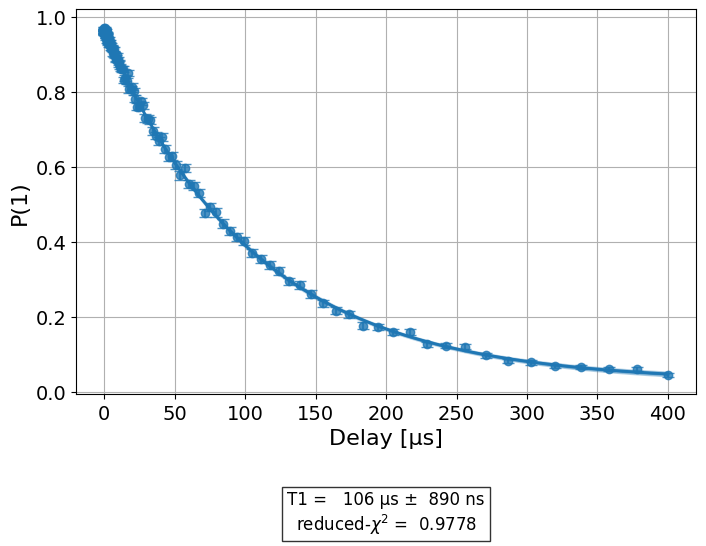

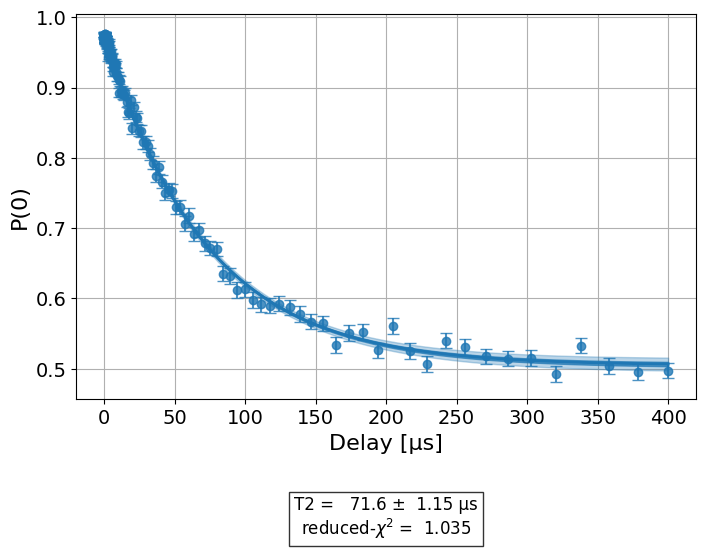

qubit_10


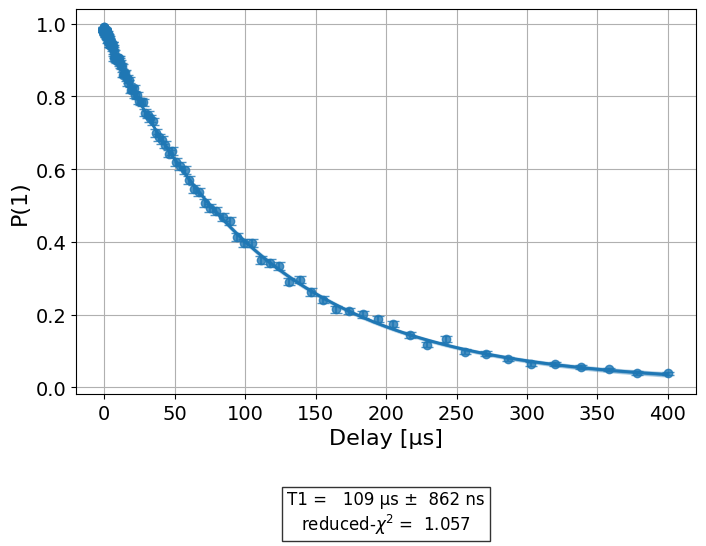

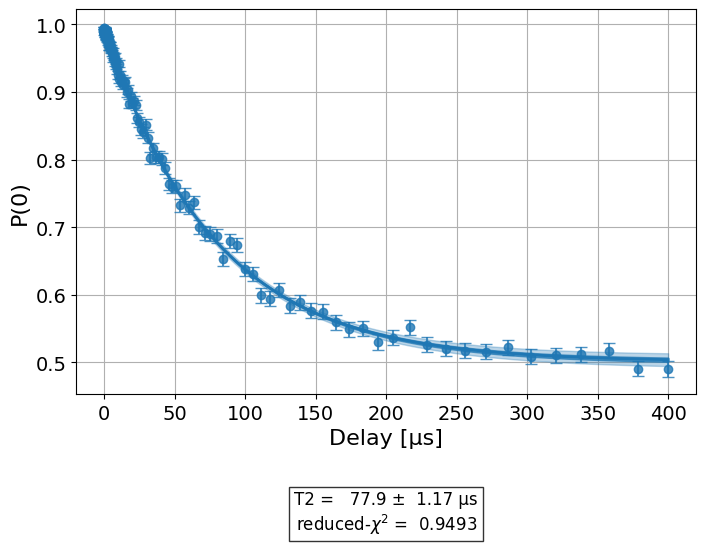

qubit_13


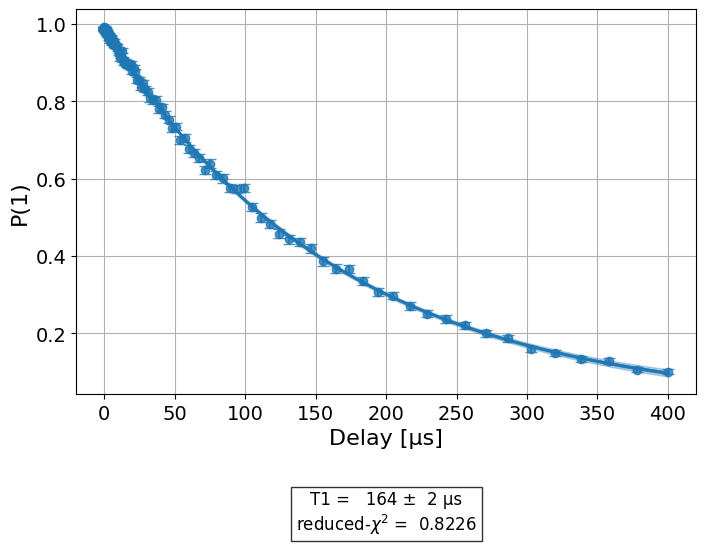

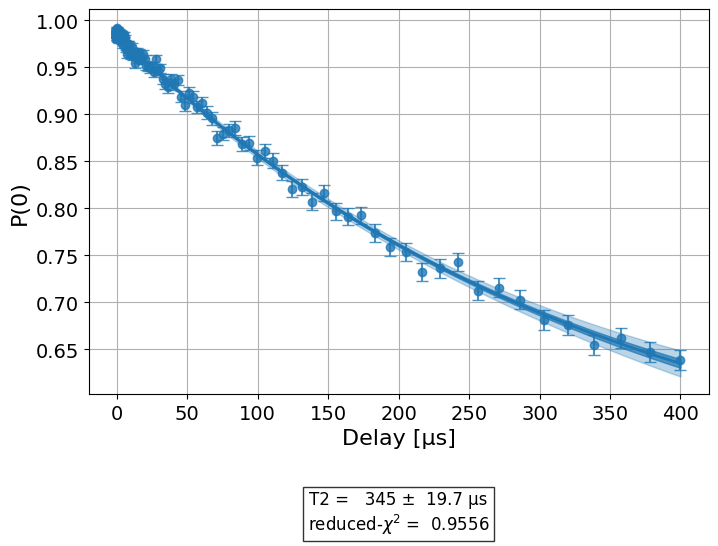

qubit_15


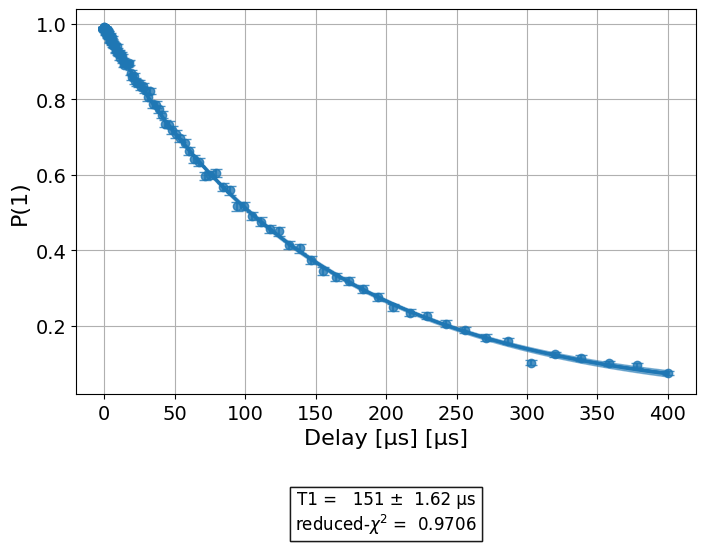

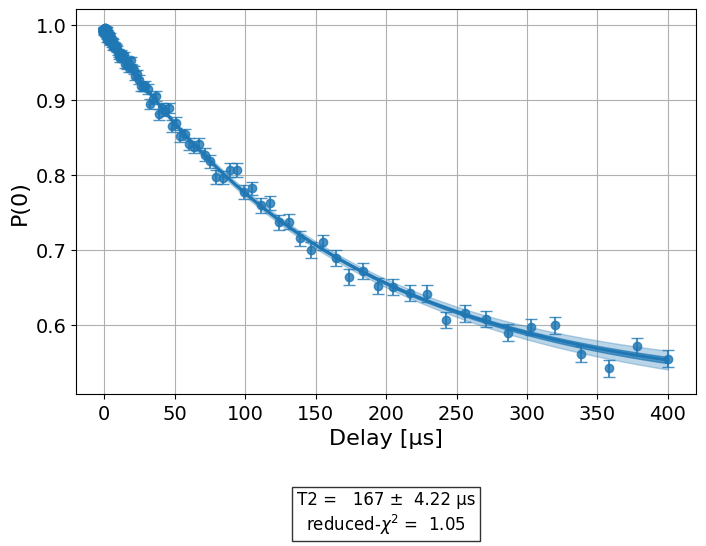

qubit_20


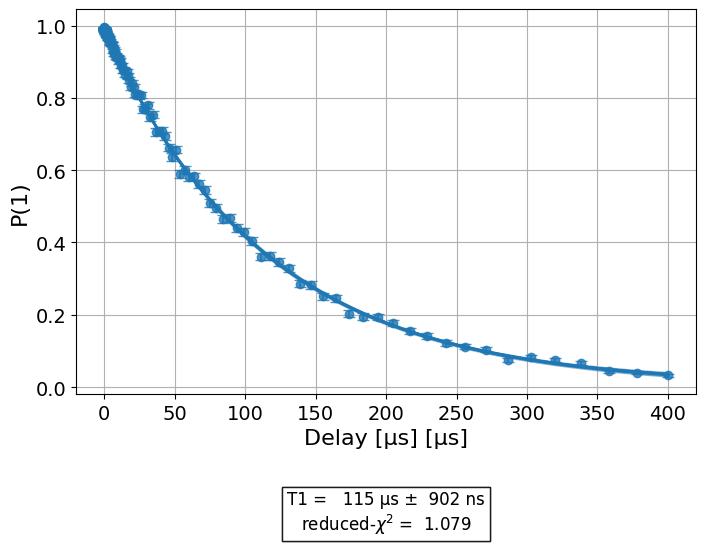

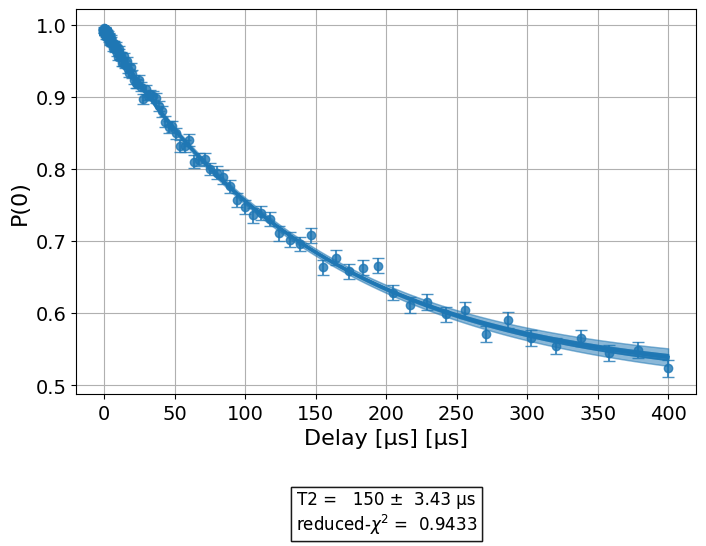

qubit_21


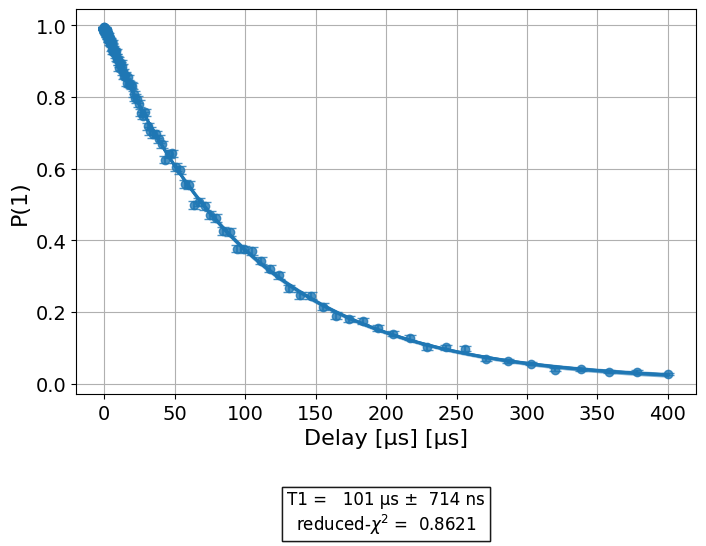

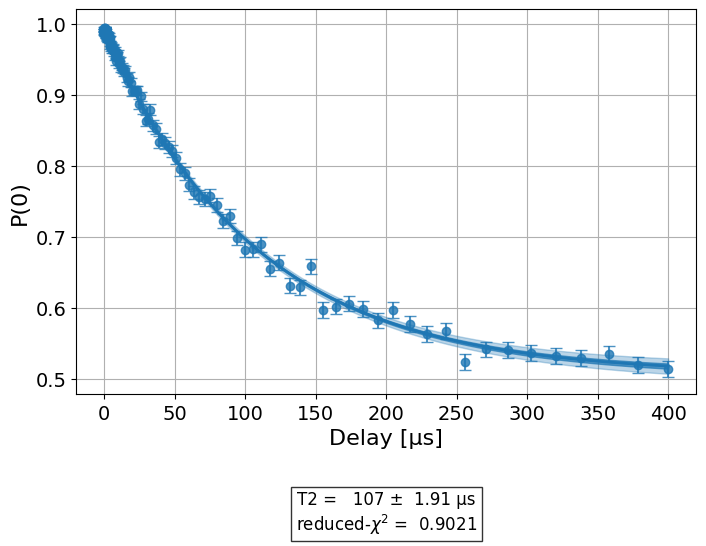

qubit_22


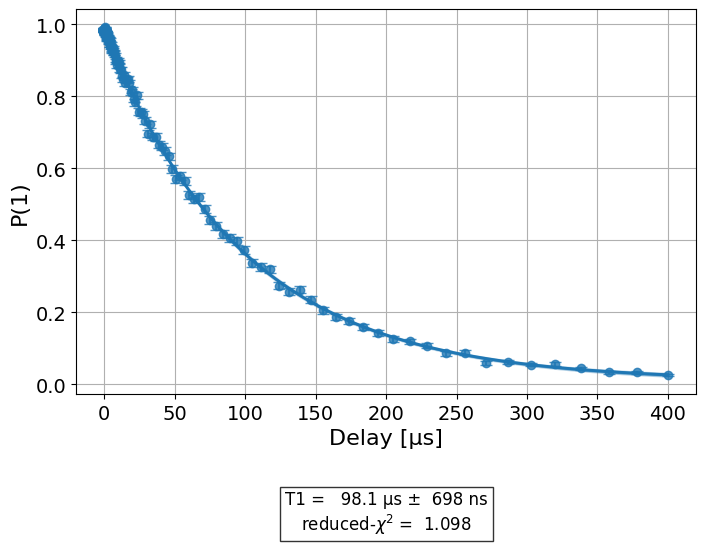

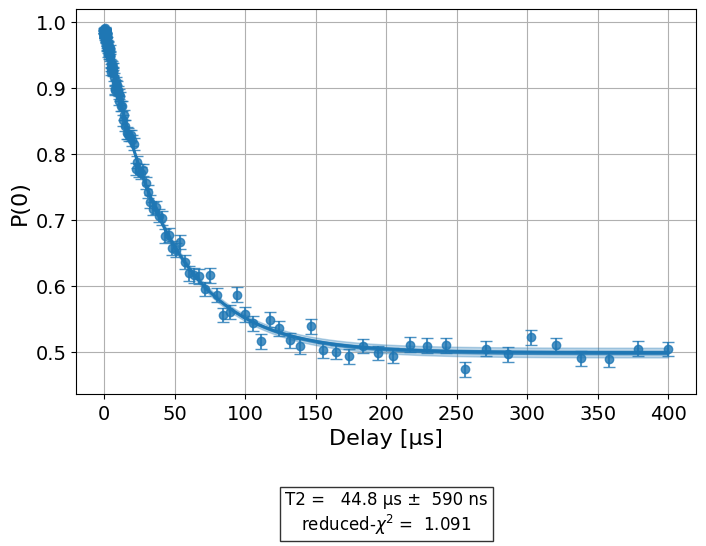

Batch1
qubit_6


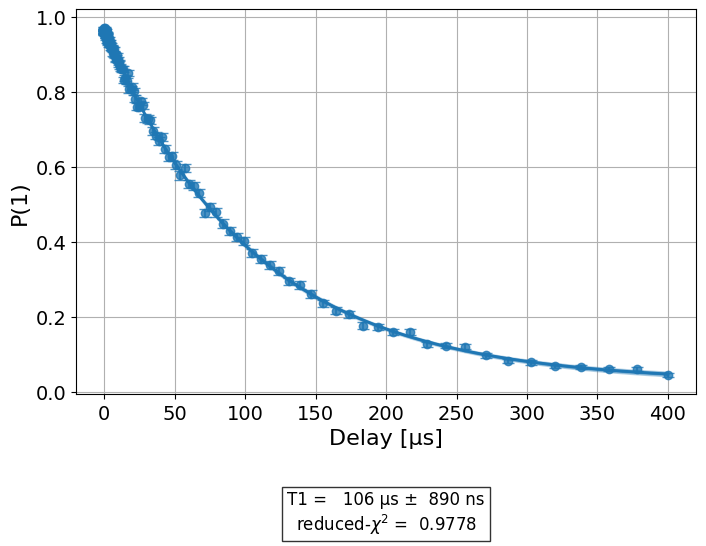

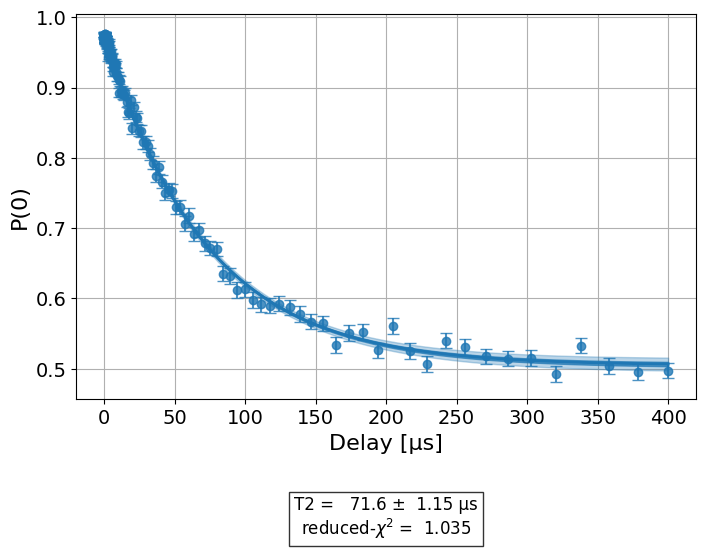

qubit_10


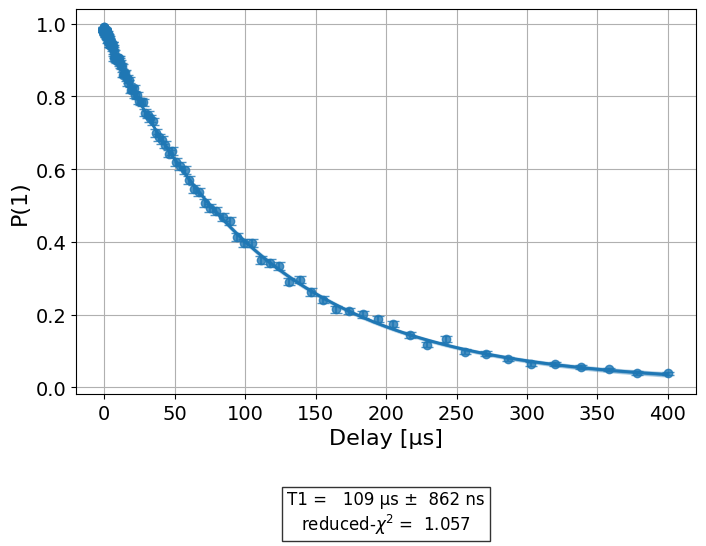

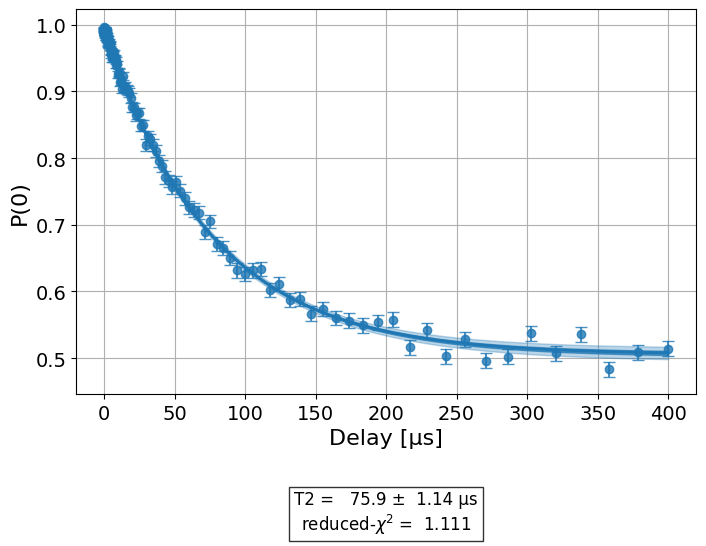

qubit_13


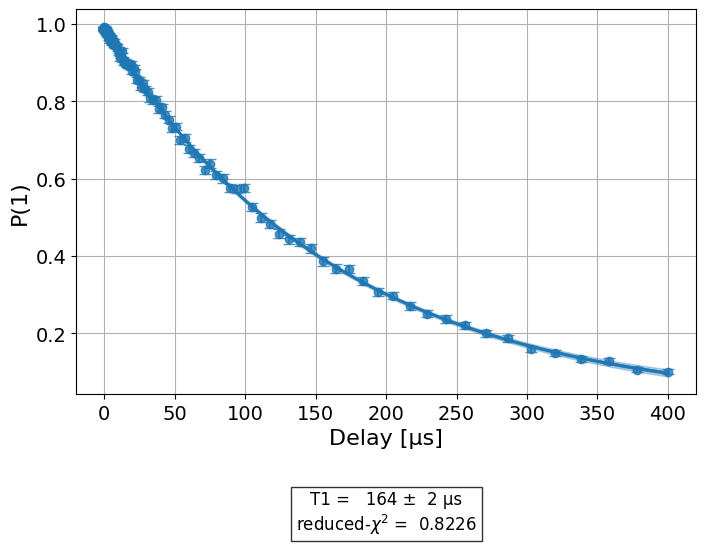

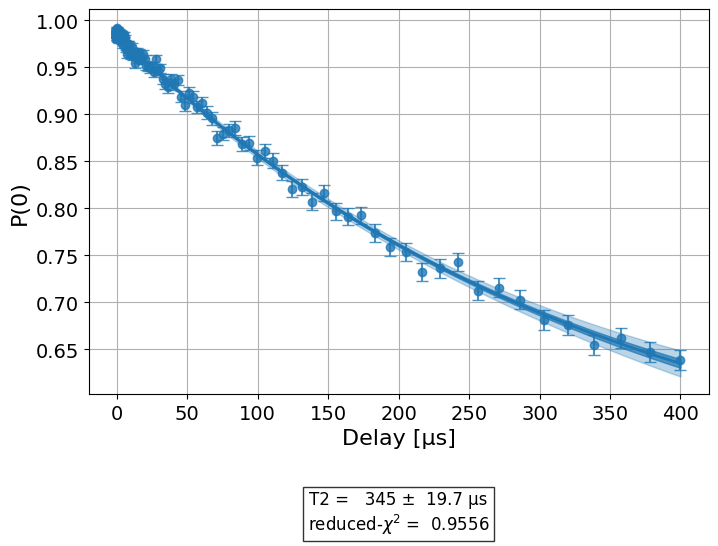

qubit_15


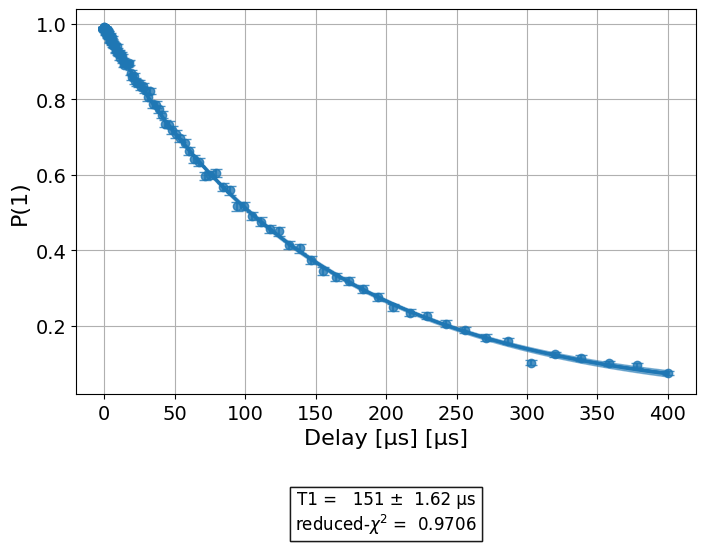

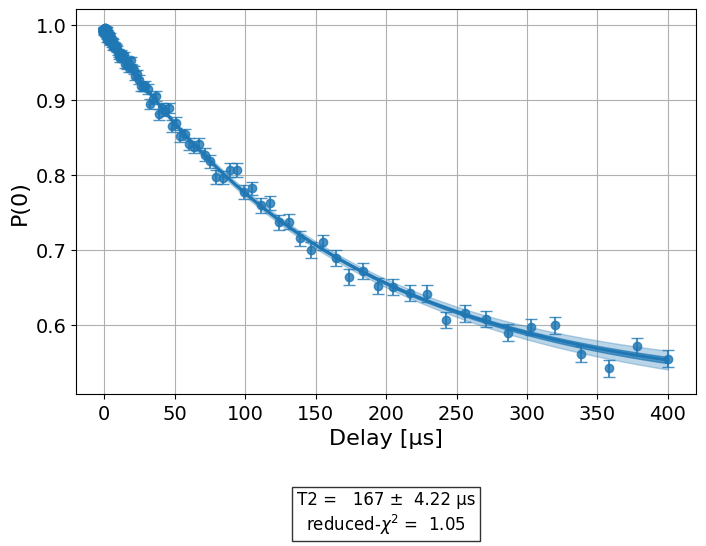

qubit_20


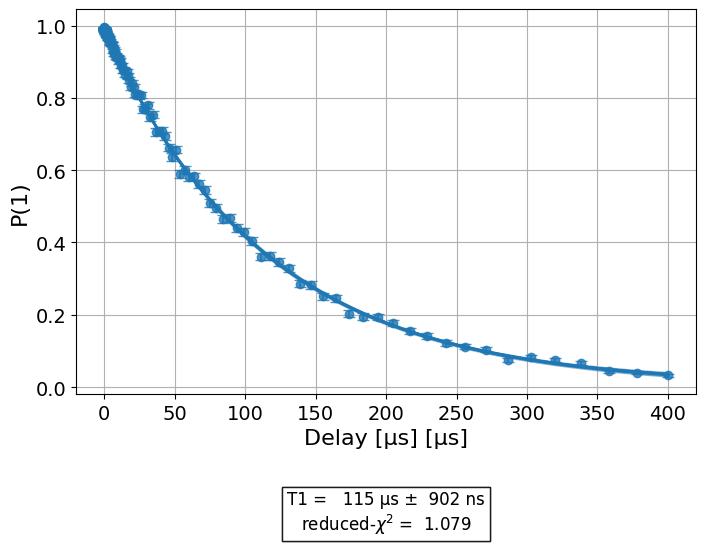

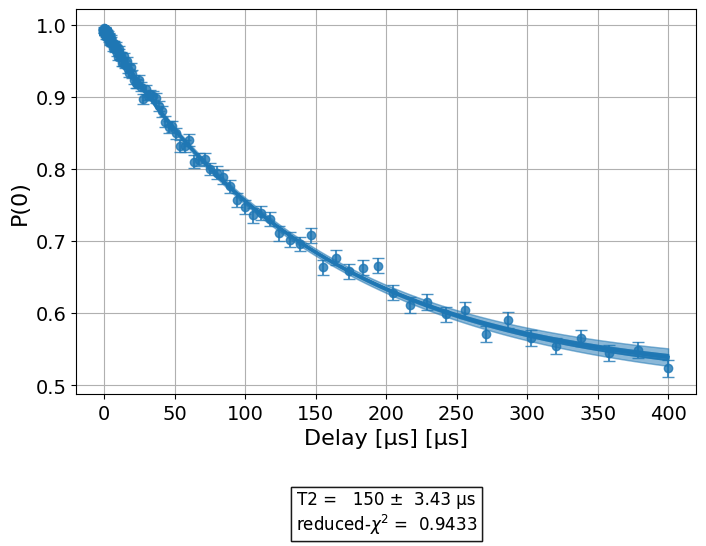

qubit_21


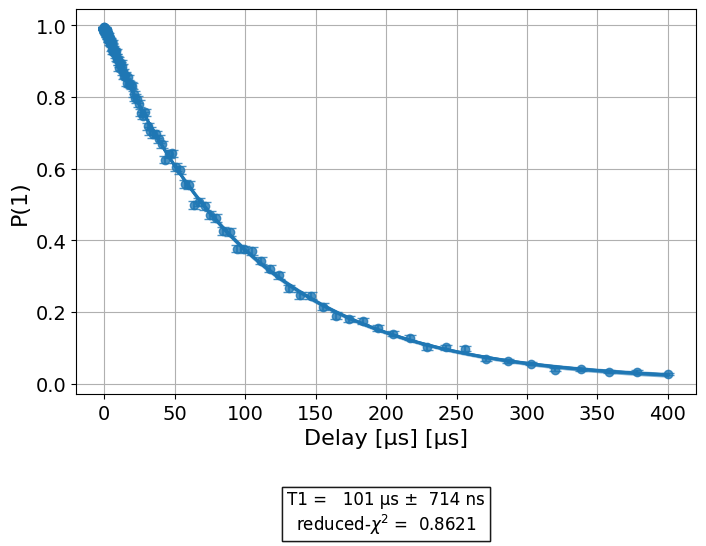

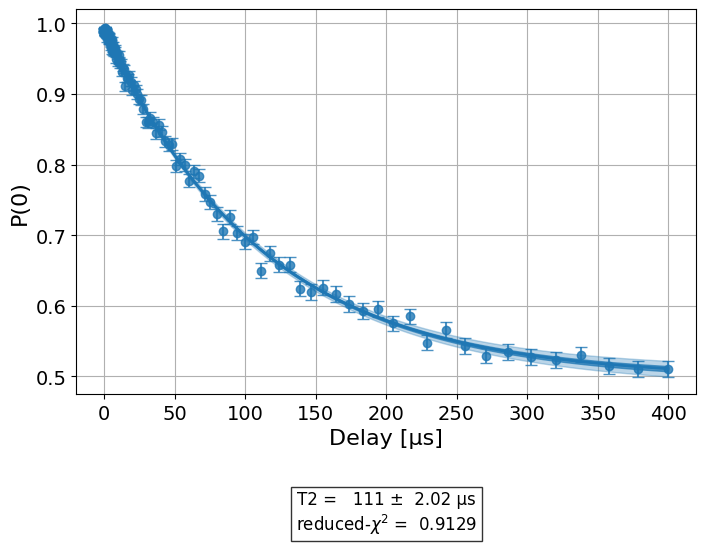

qubit_22


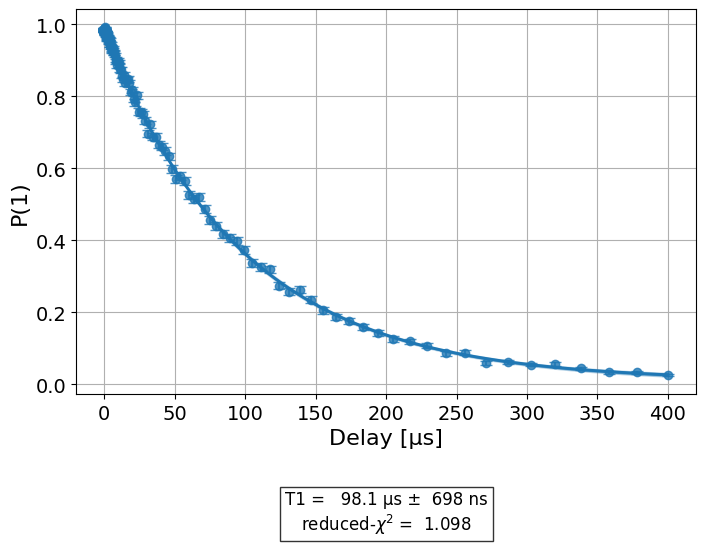

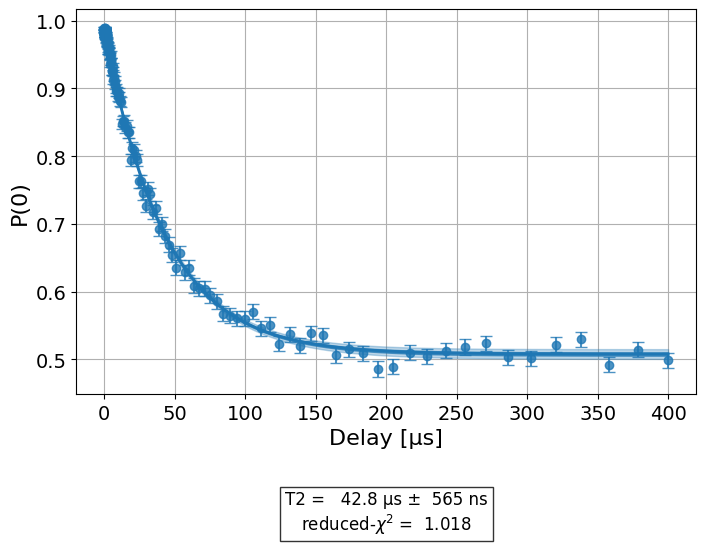

Batch2
qubit_6


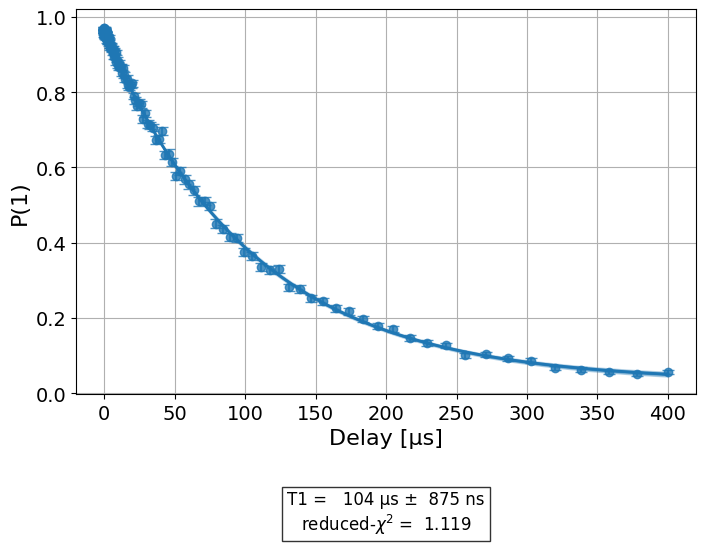

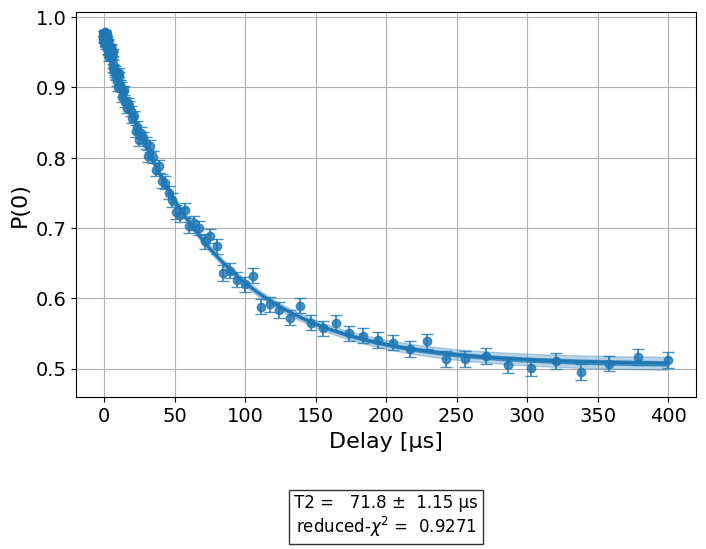

qubit_10


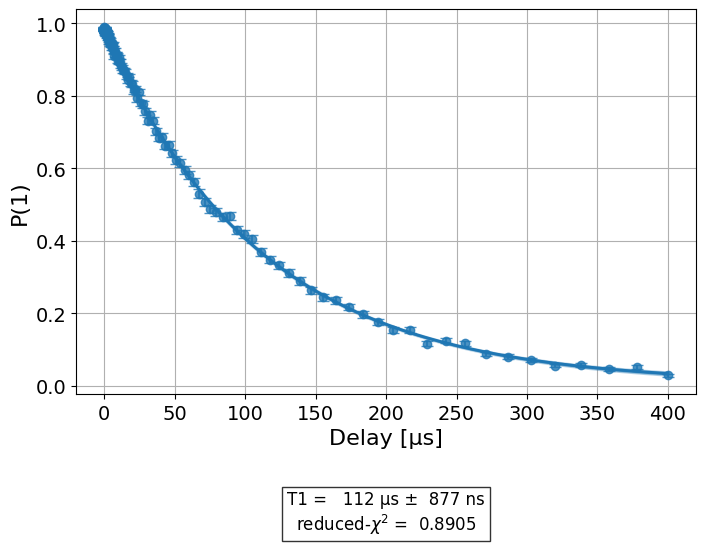

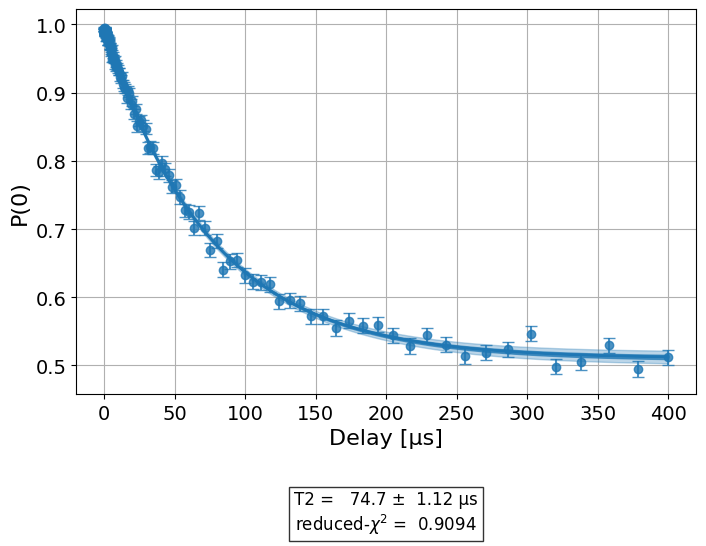

qubit_13


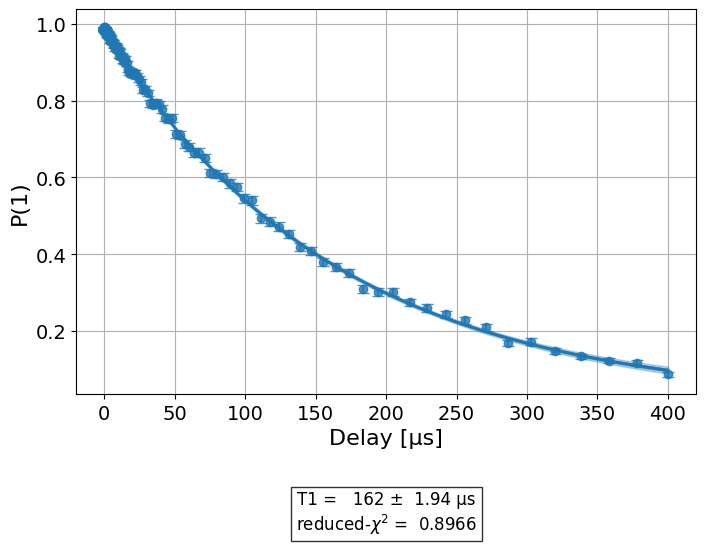

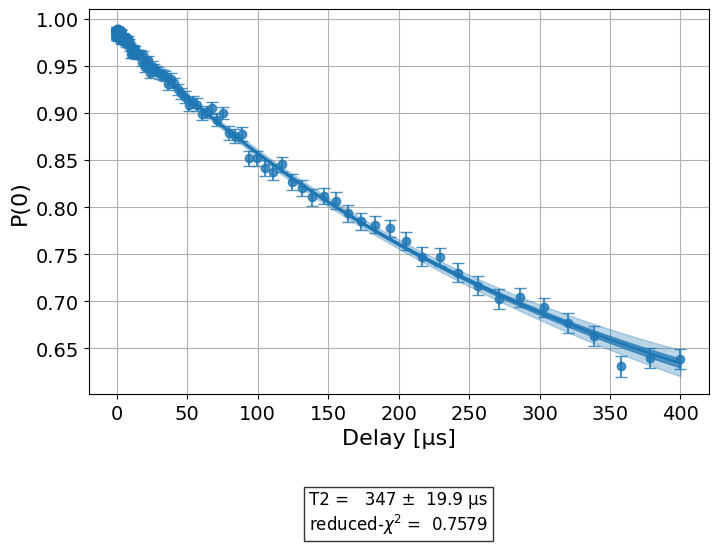

qubit_15


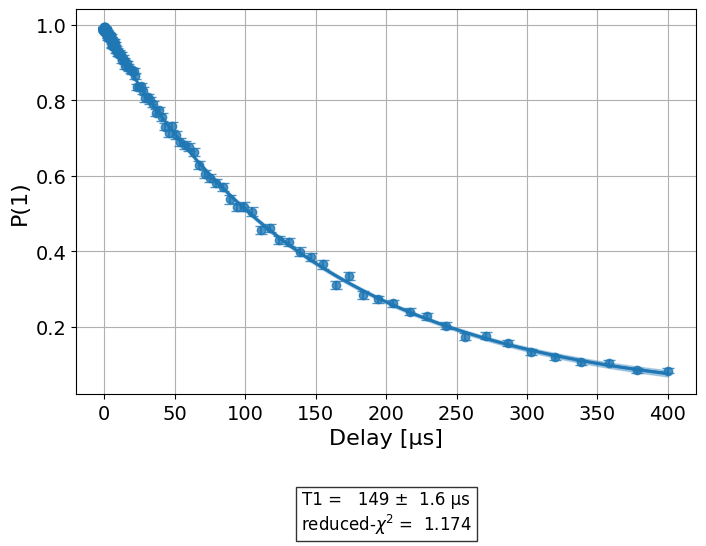

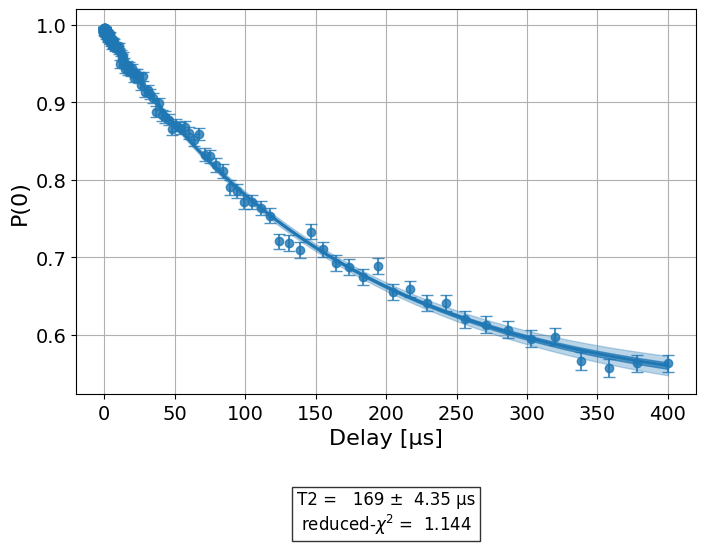

qubit_20


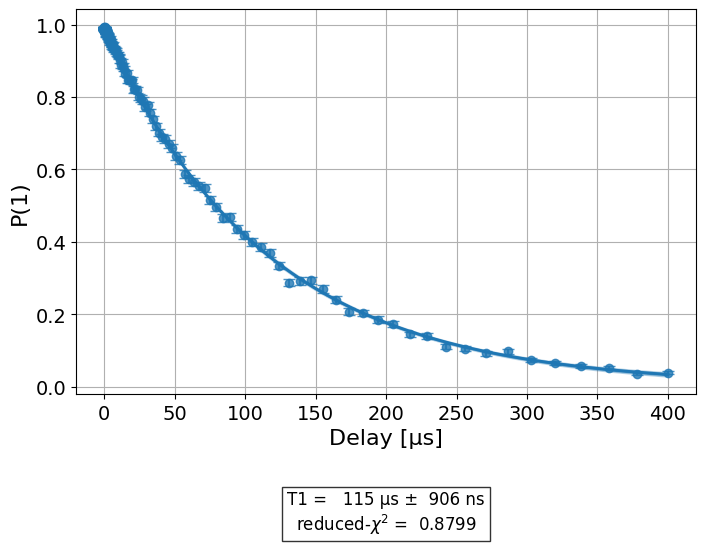

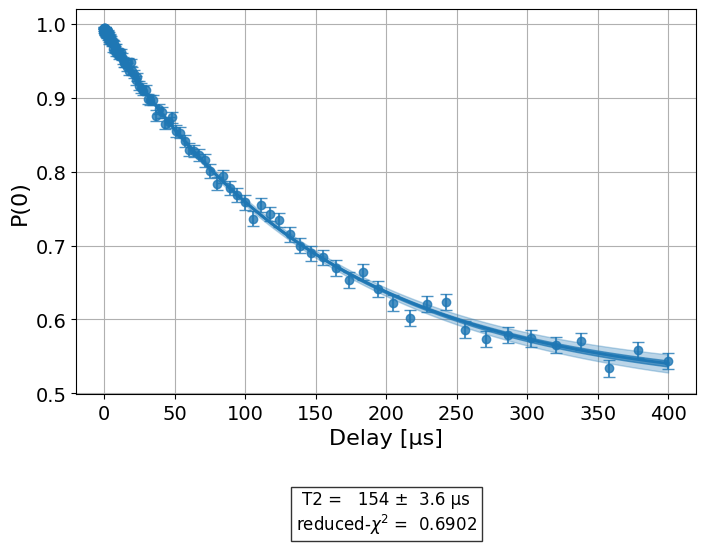

qubit_21


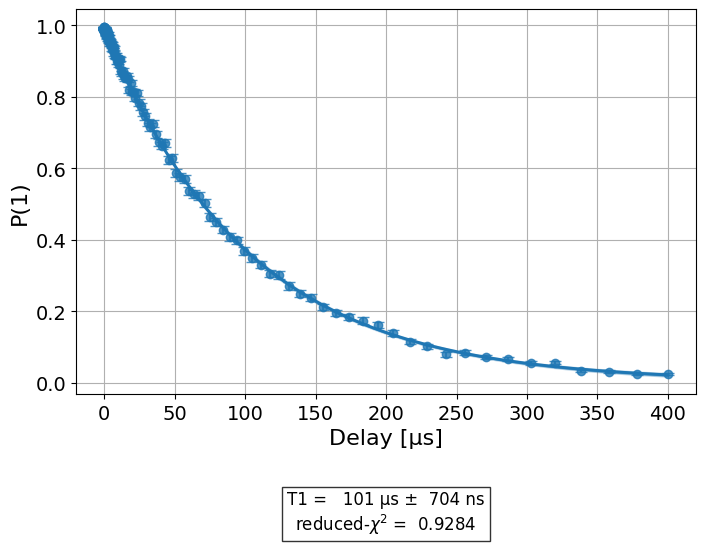

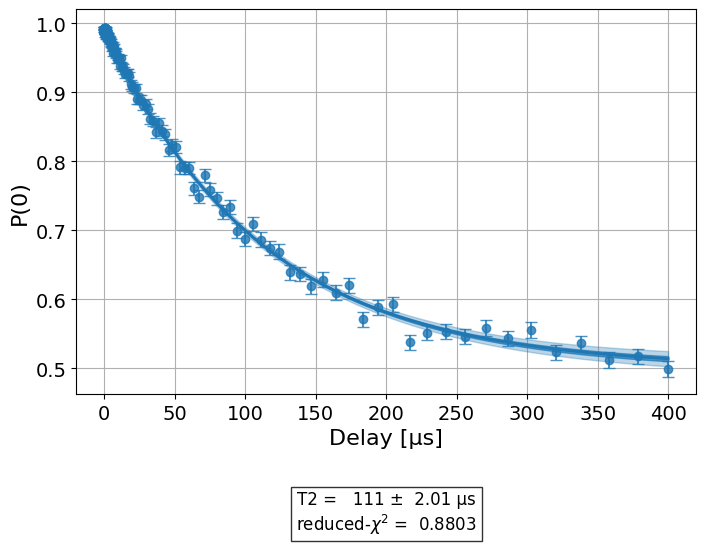

qubit_22


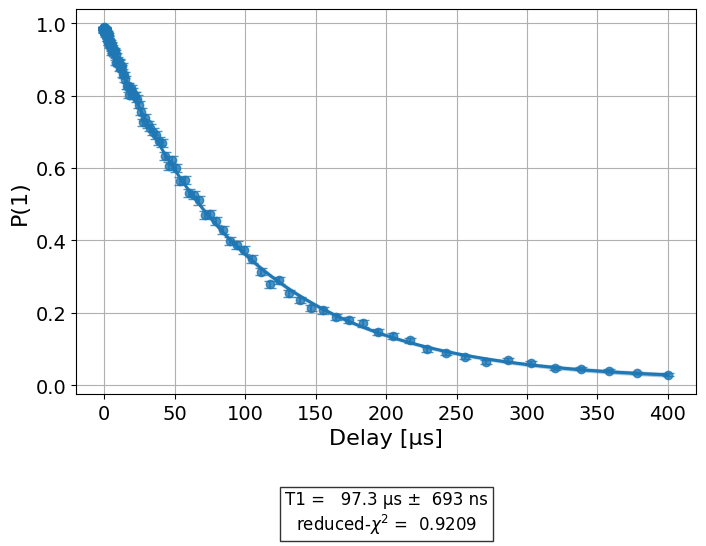

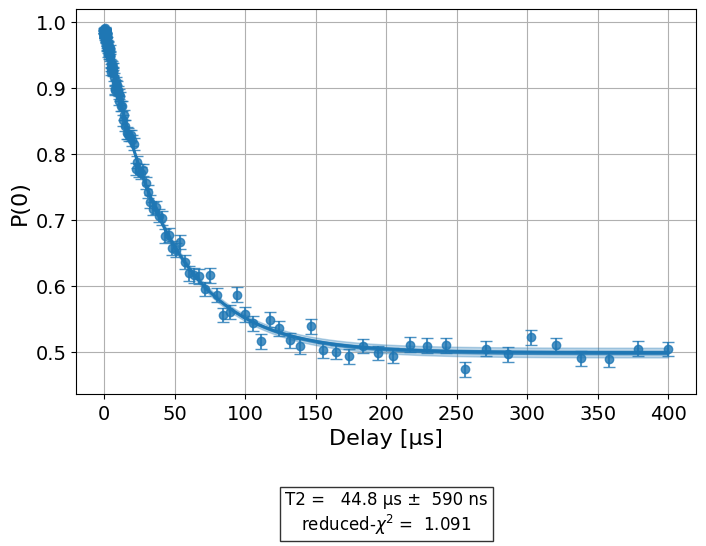

Batch3
qubit_6


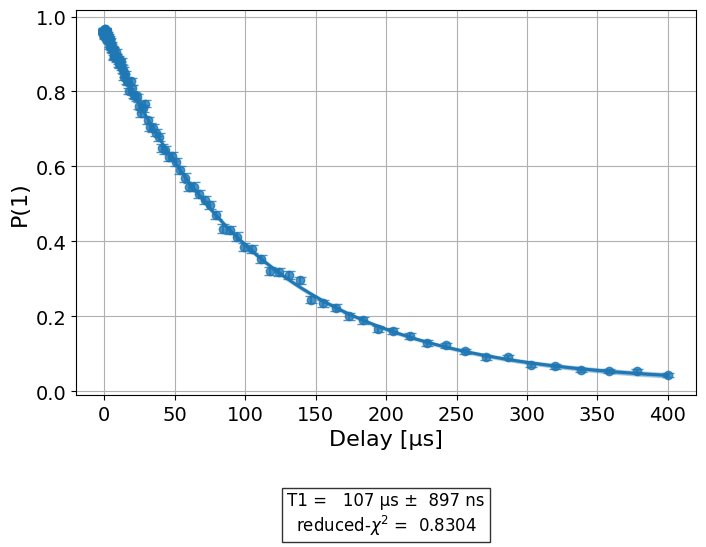

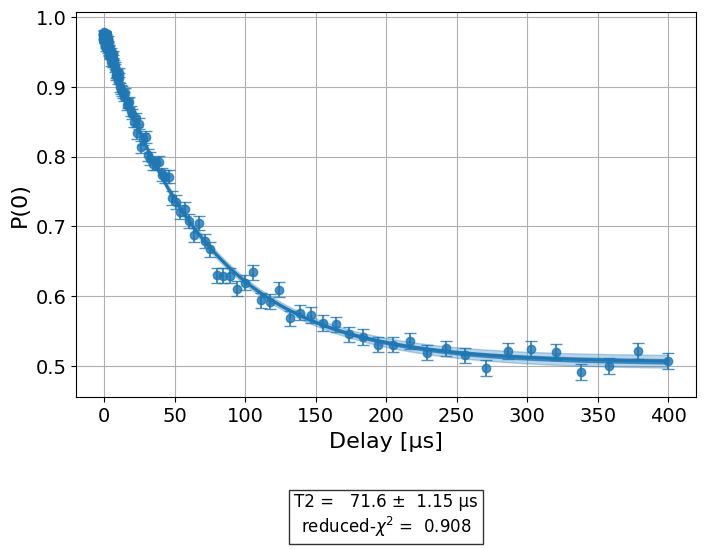

qubit_10


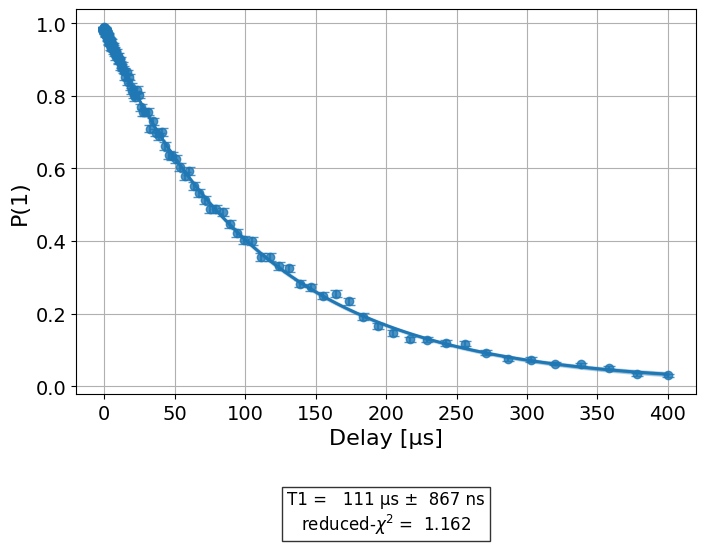

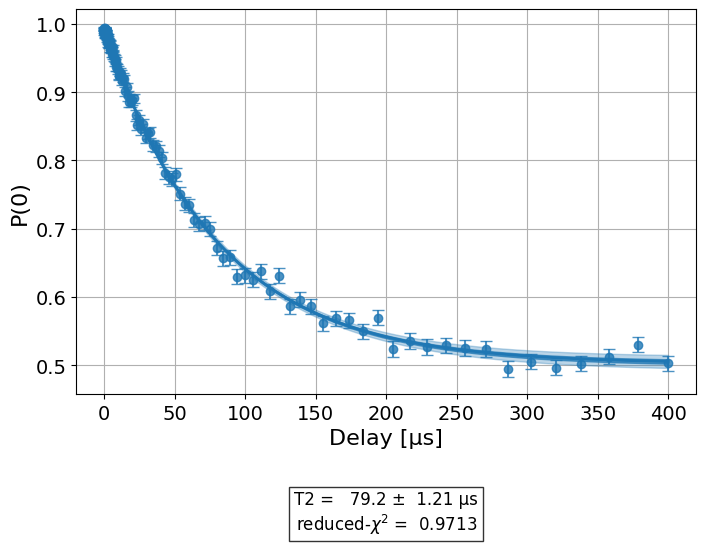

qubit_13


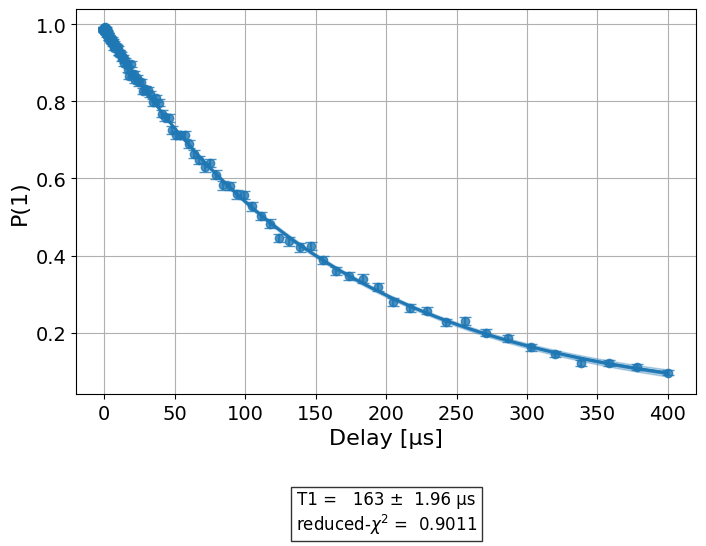

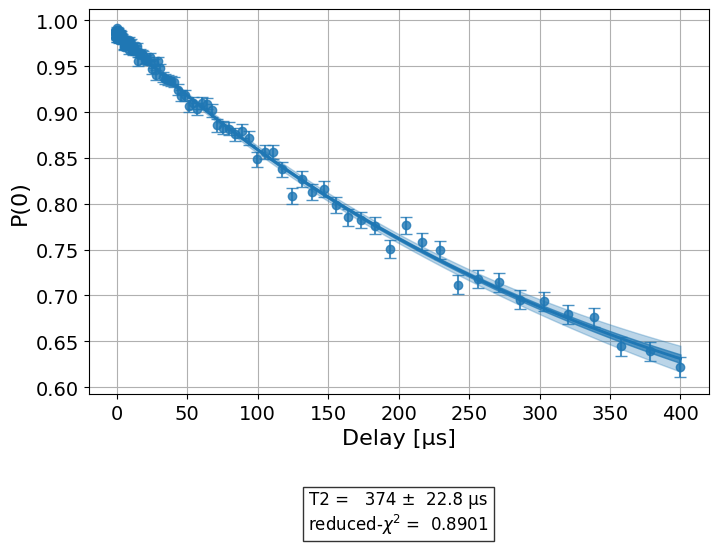

qubit_15


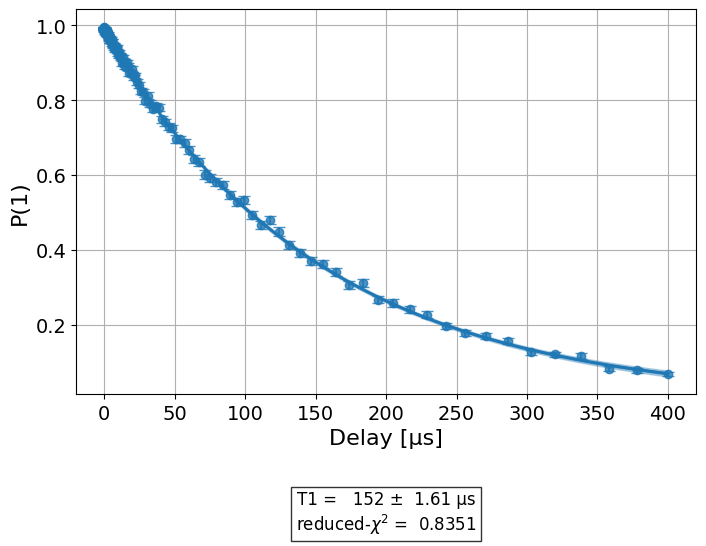

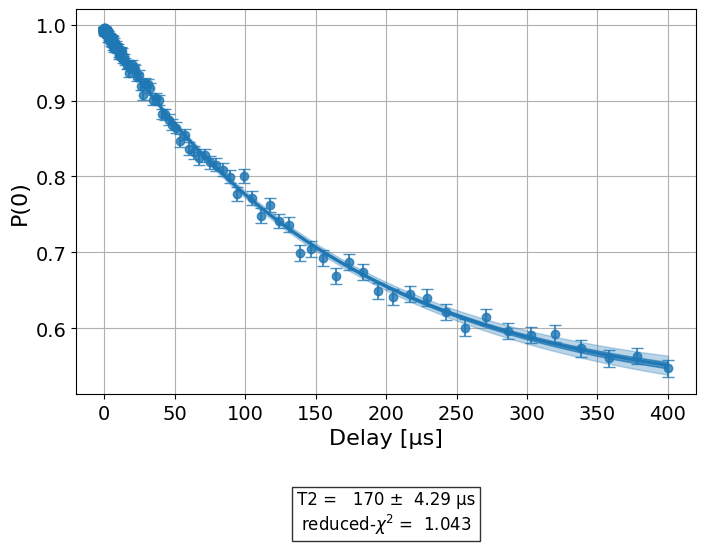

qubit_20


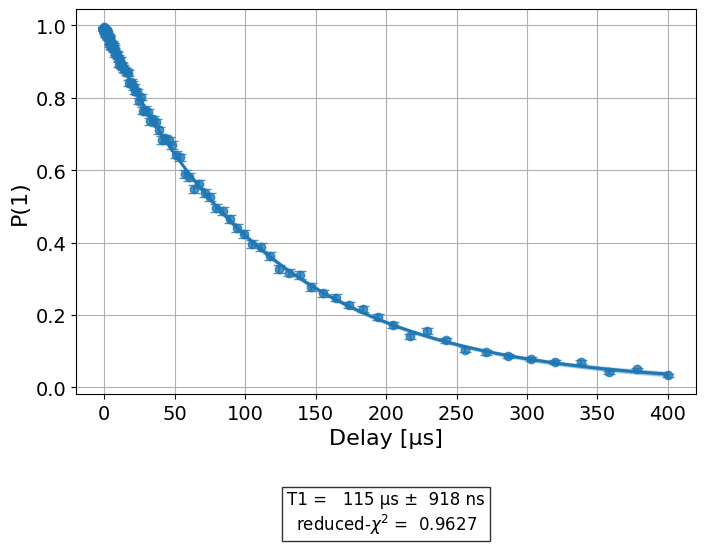

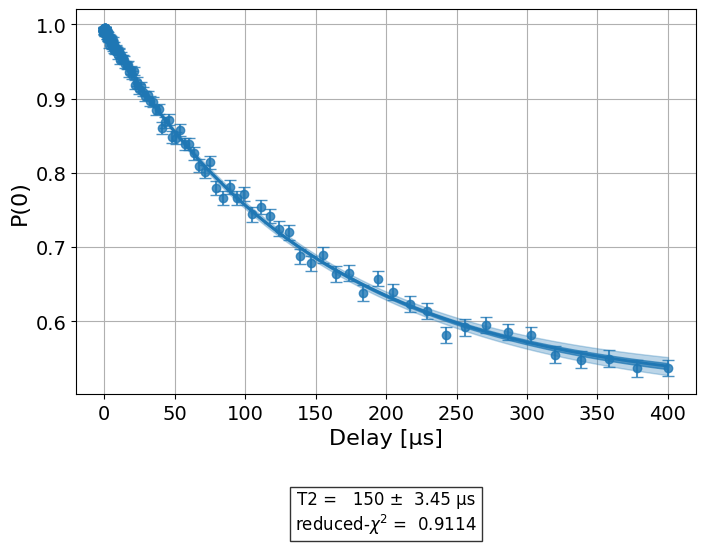

qubit_21


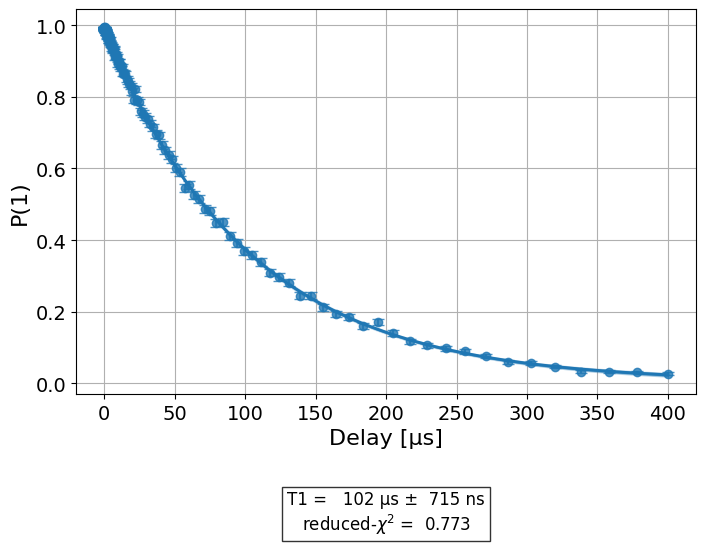

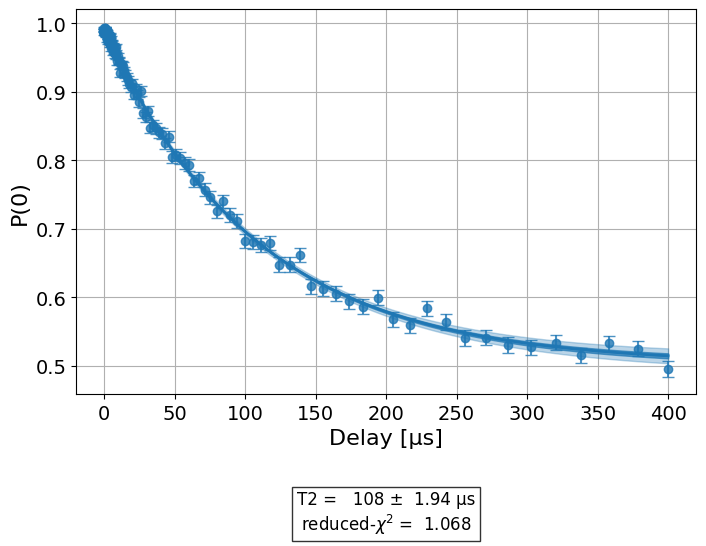

qubit_22


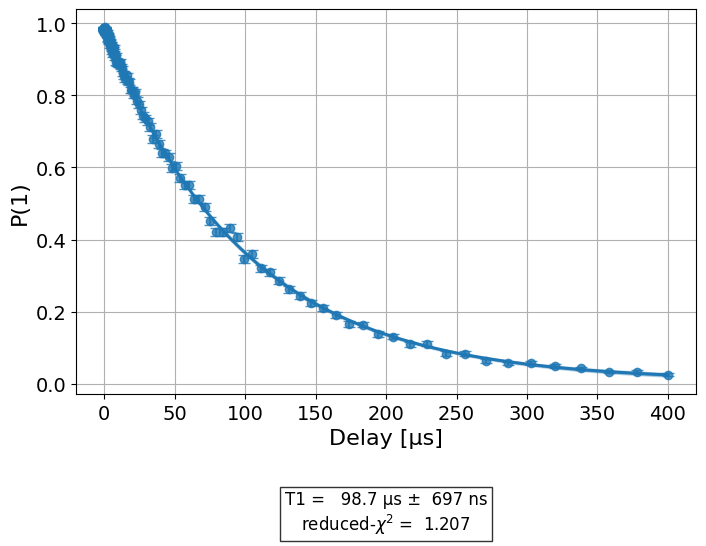

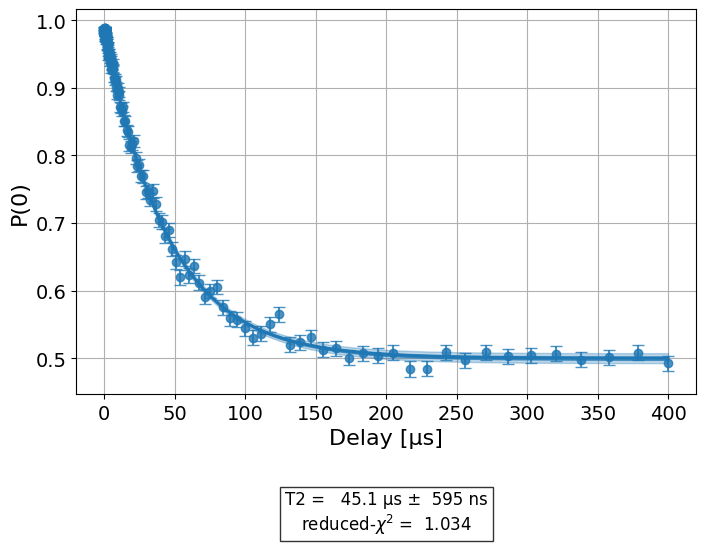

Batch4
qubit_6


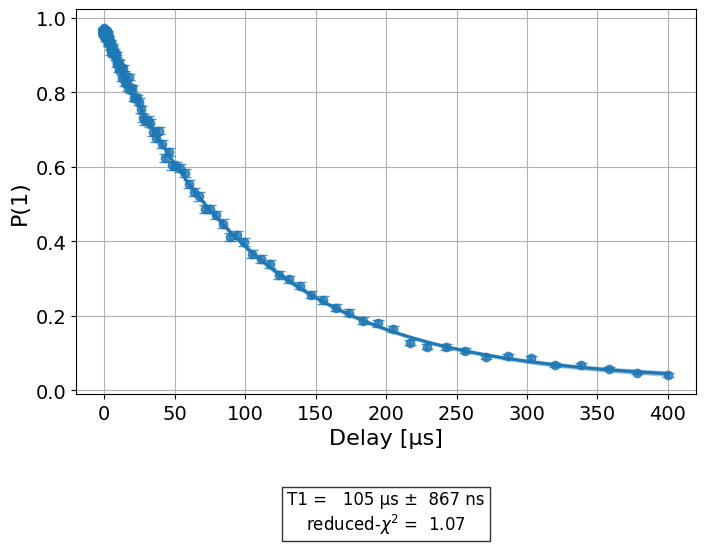

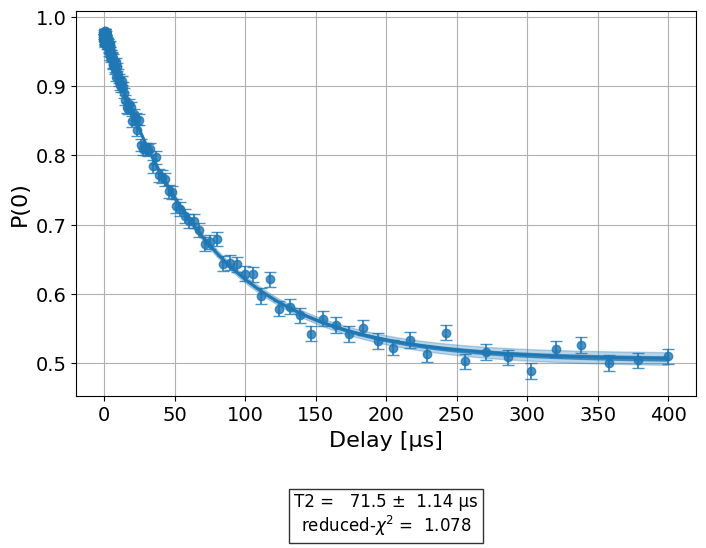

qubit_10


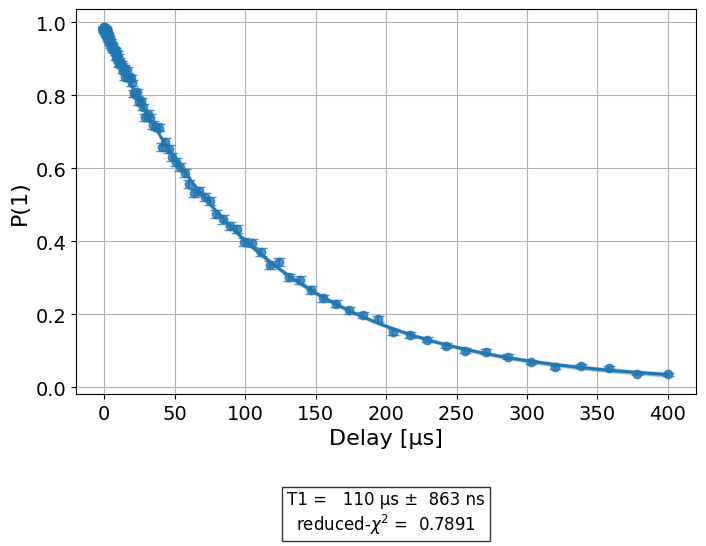

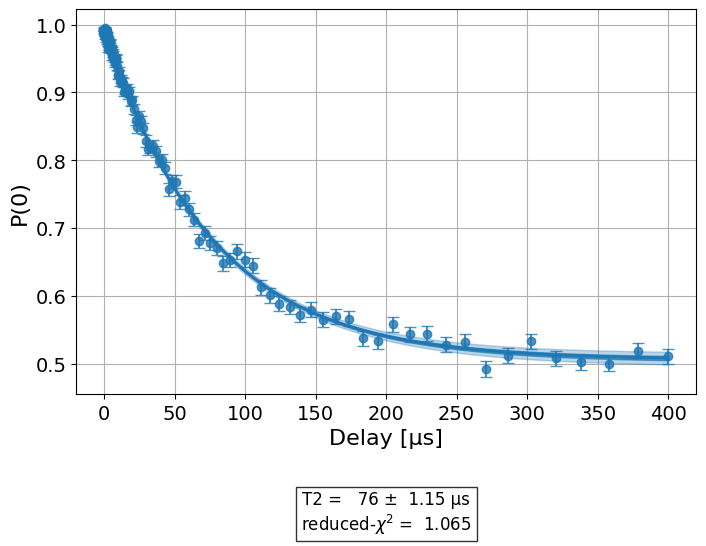

qubit_13


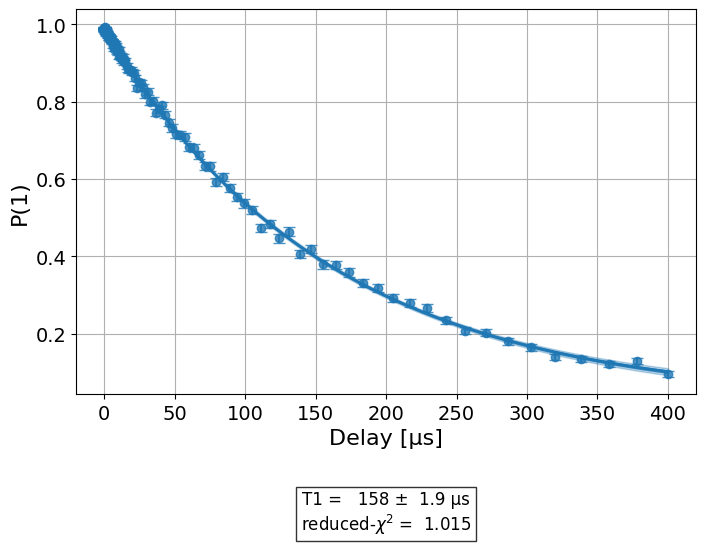

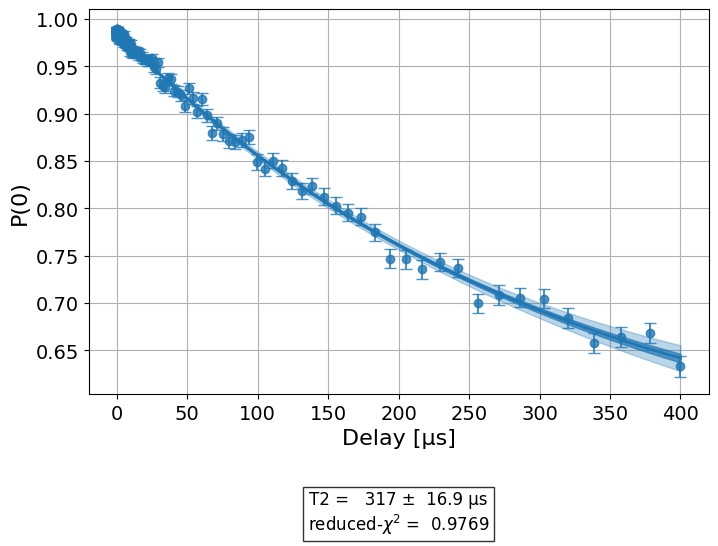

qubit_15


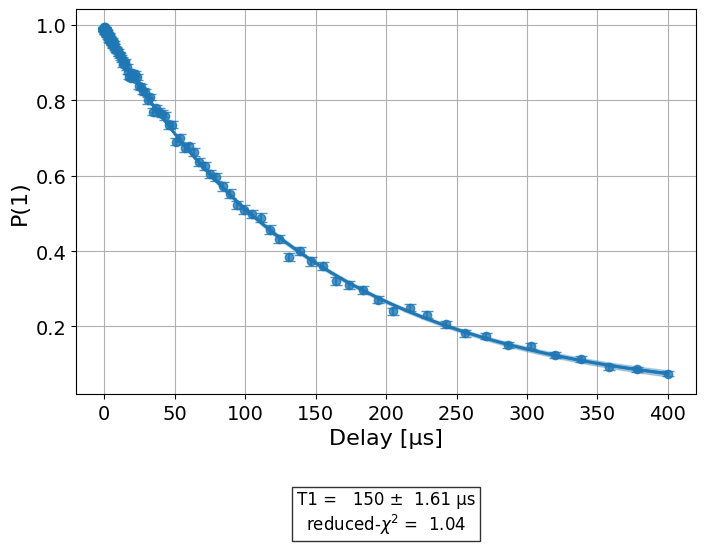

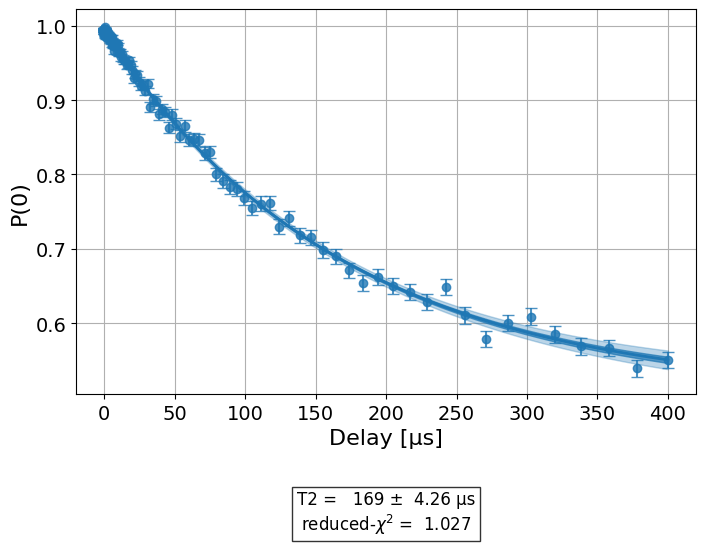

qubit_20


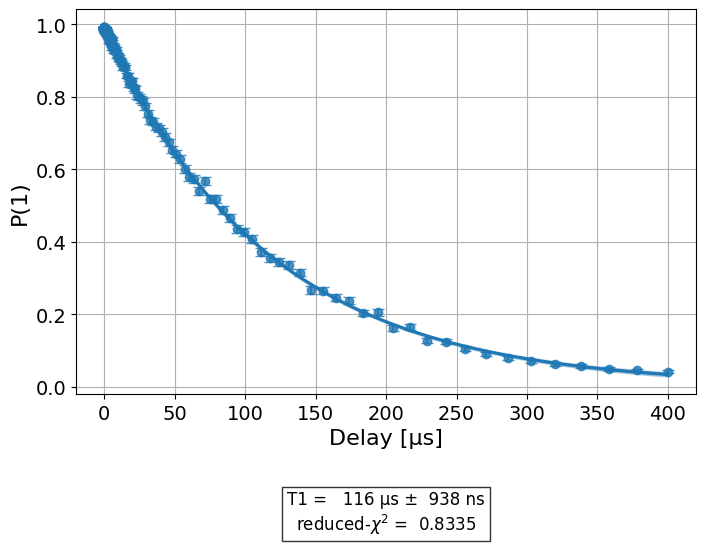

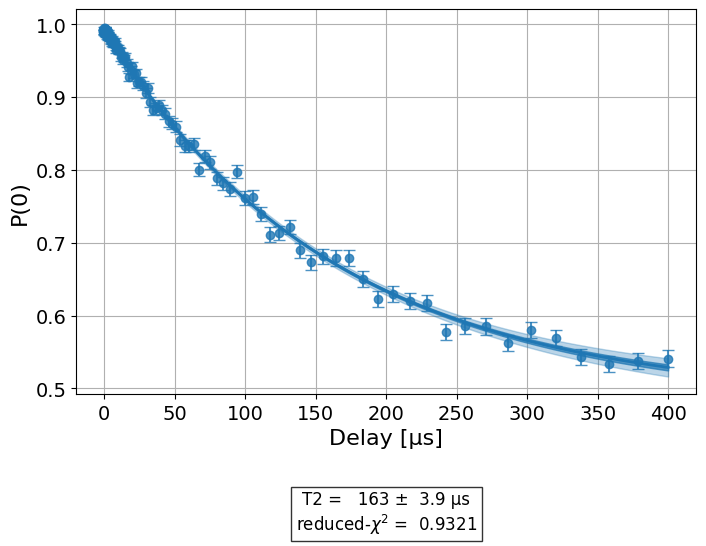

qubit_21


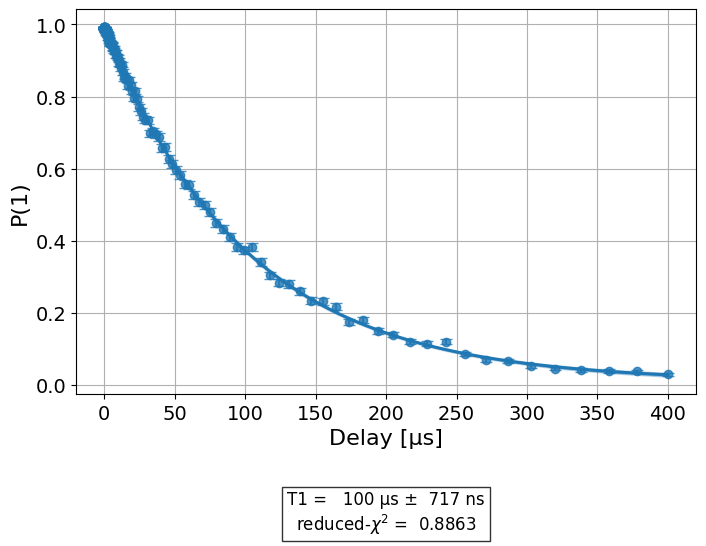

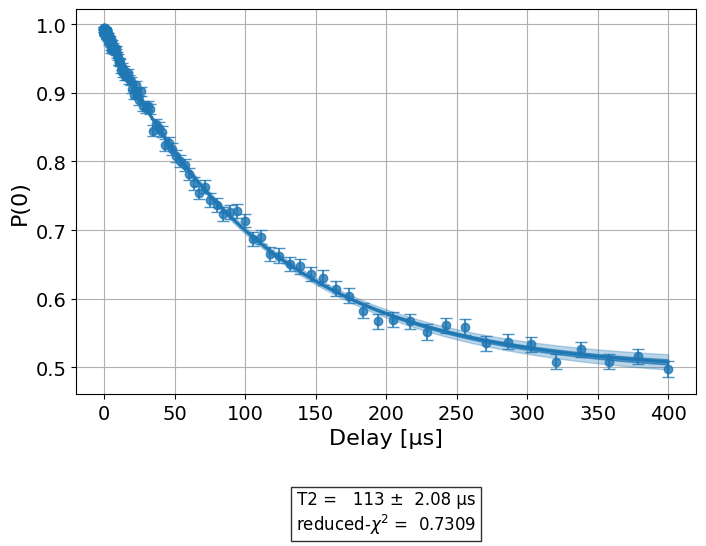

qubit_22


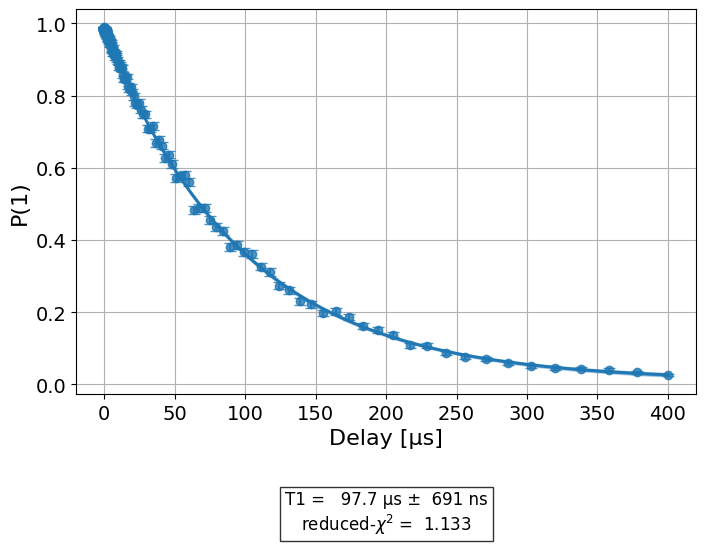

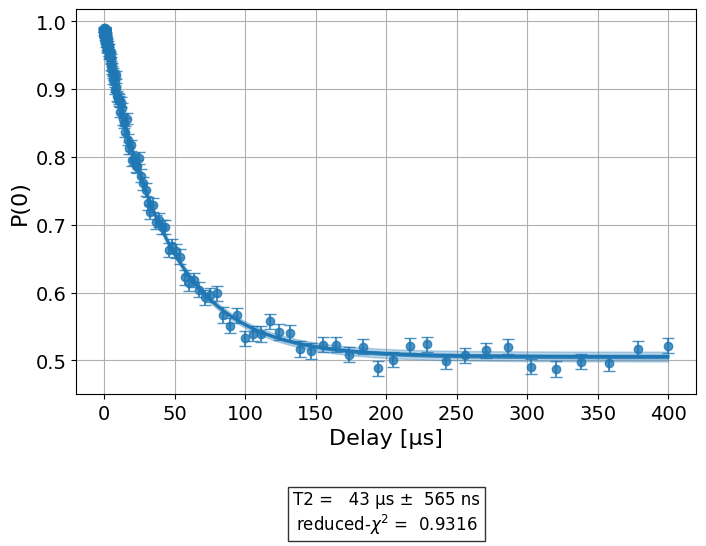

Batch5
qubit_6


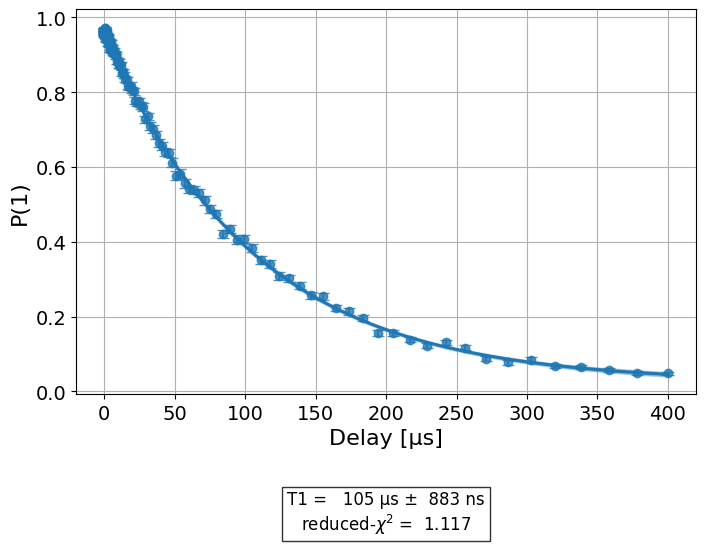

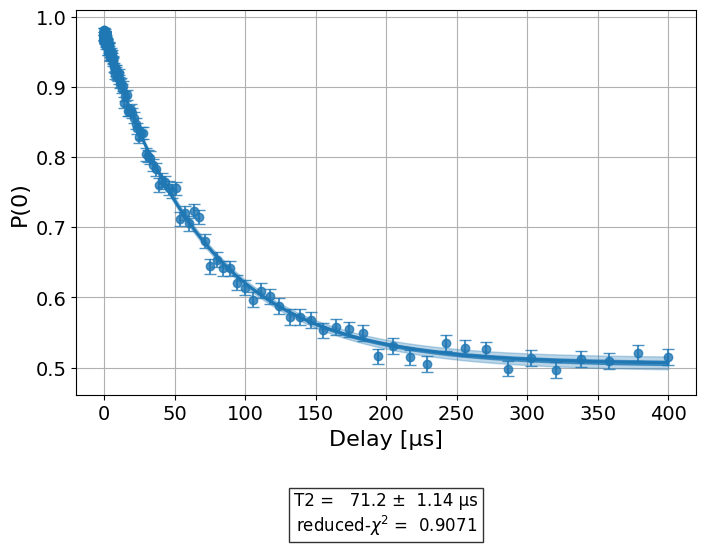

qubit_10


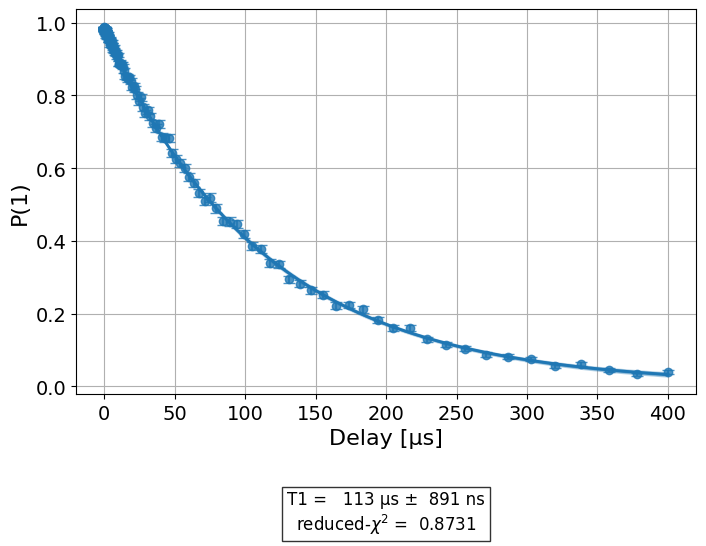

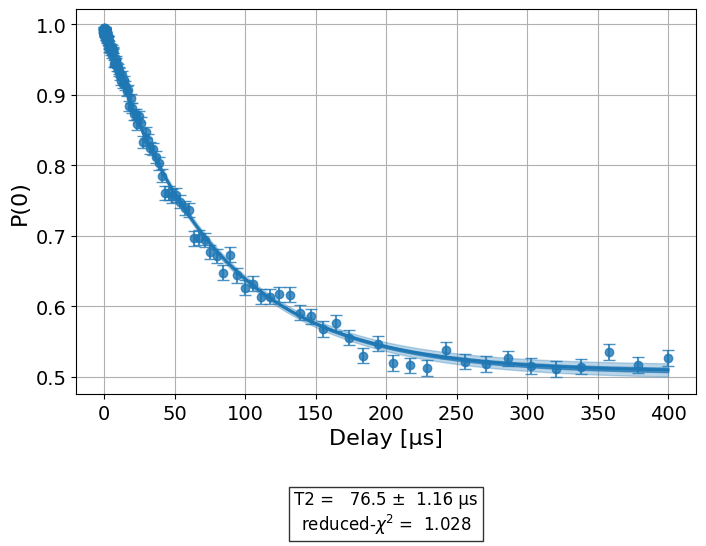

qubit_13


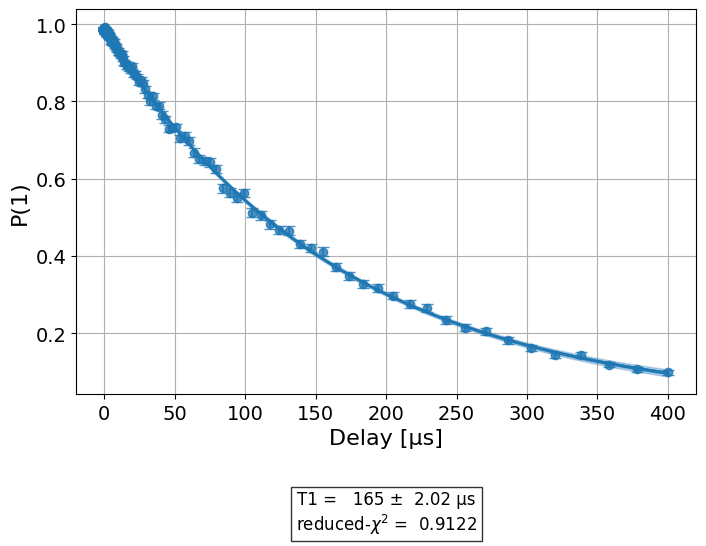

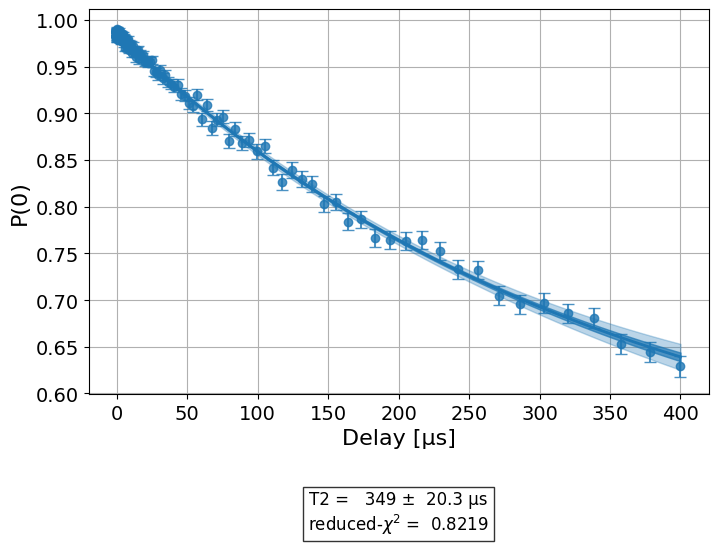

qubit_15


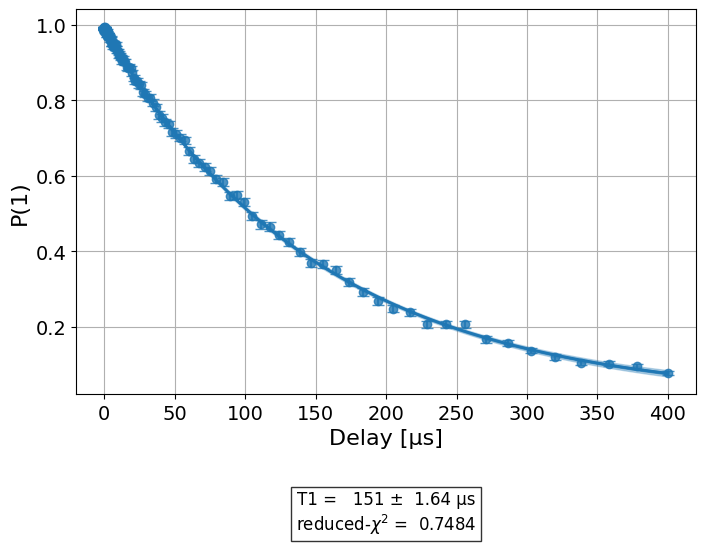

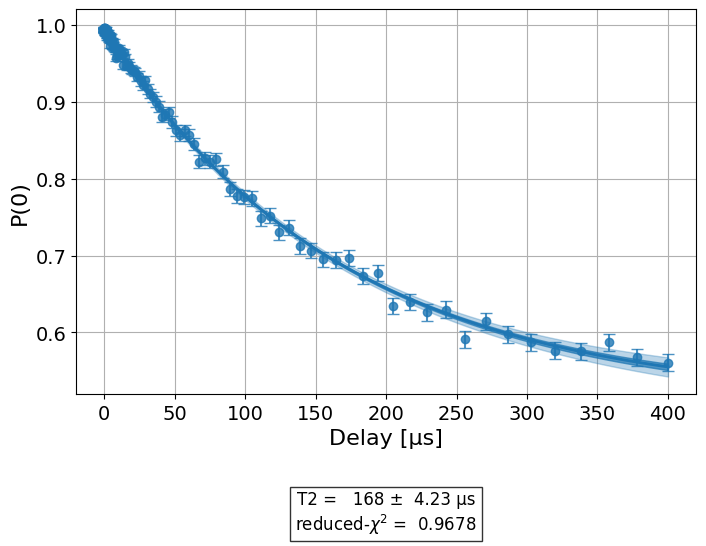

qubit_20


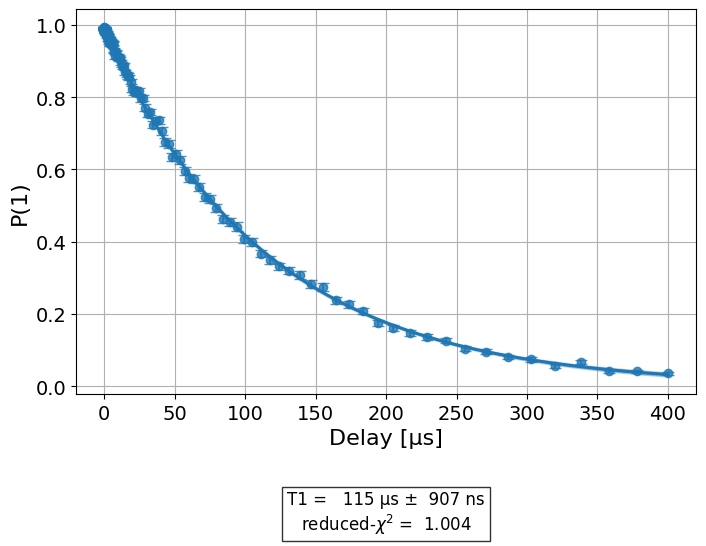

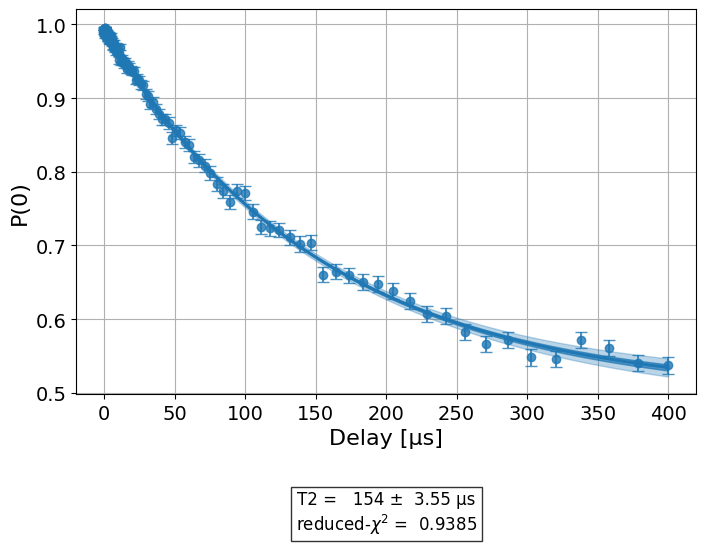

qubit_21


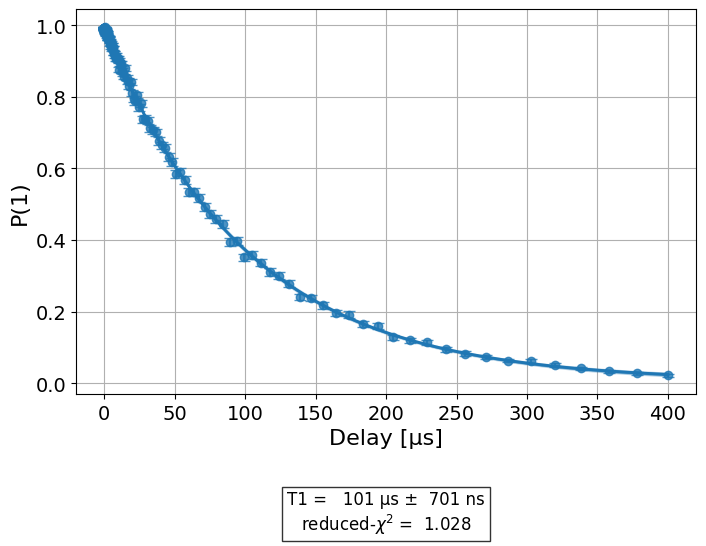

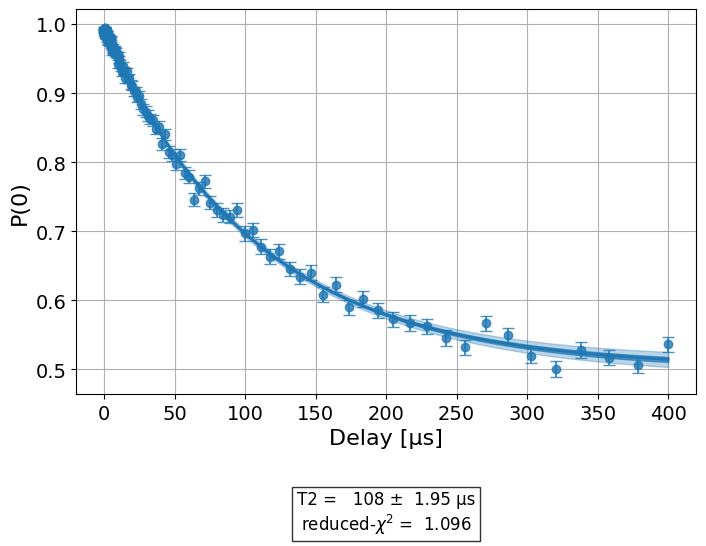

qubit_22


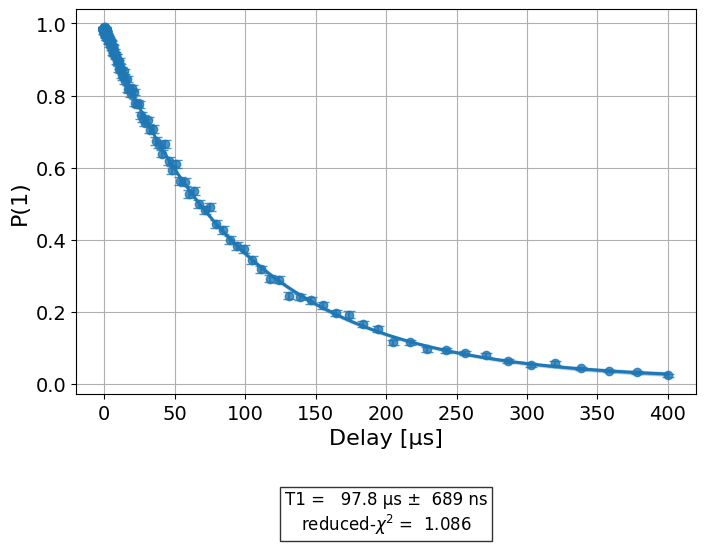

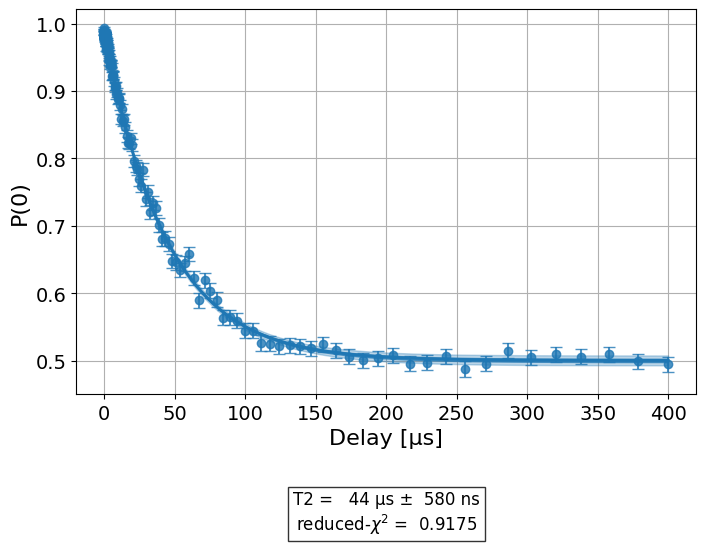

Batch6
qubit_6


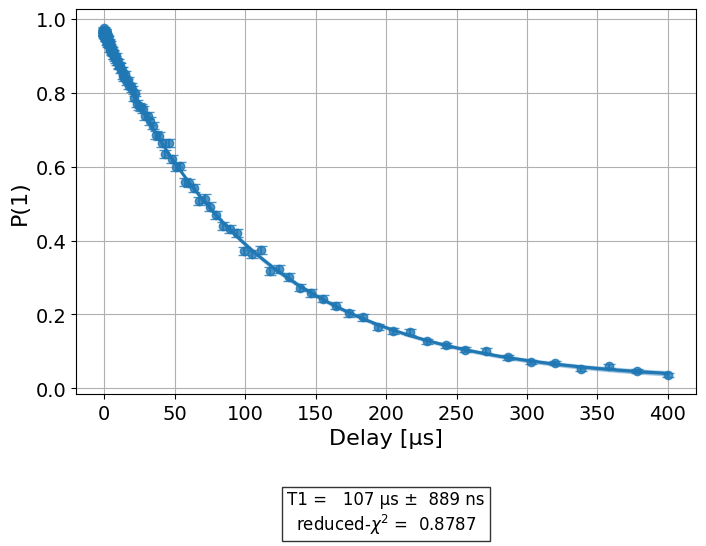

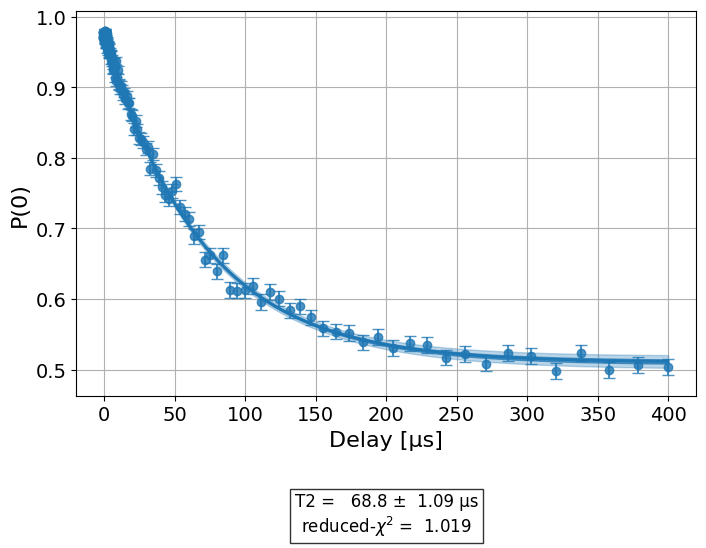

qubit_10


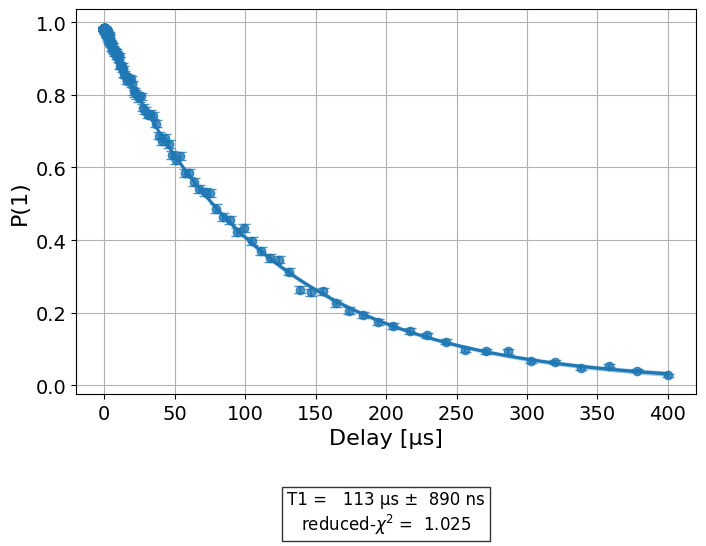

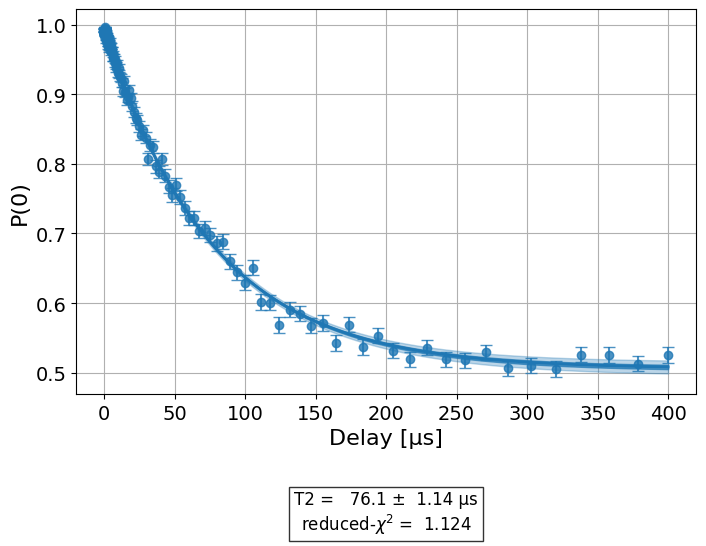

qubit_13


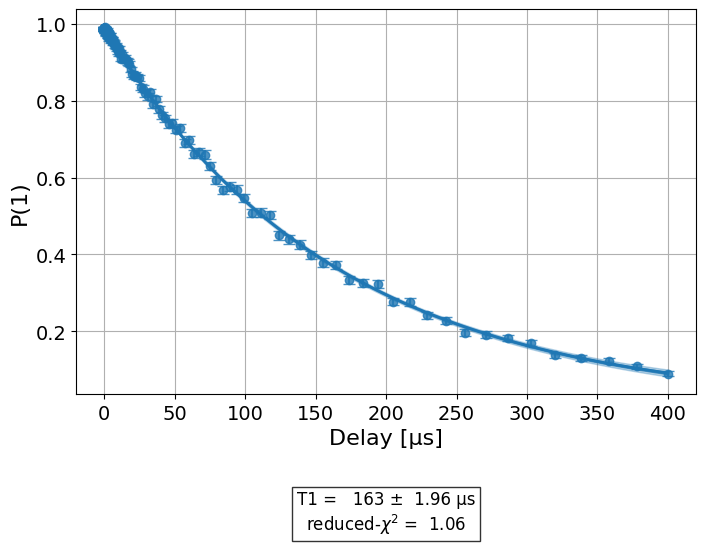

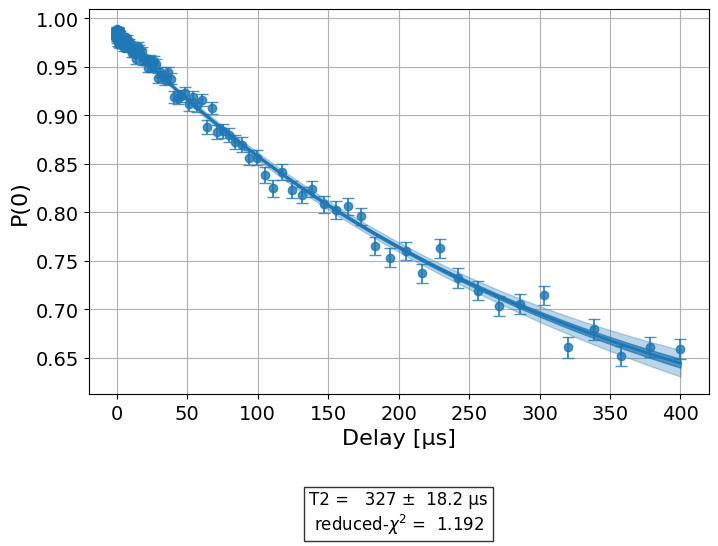

qubit_15


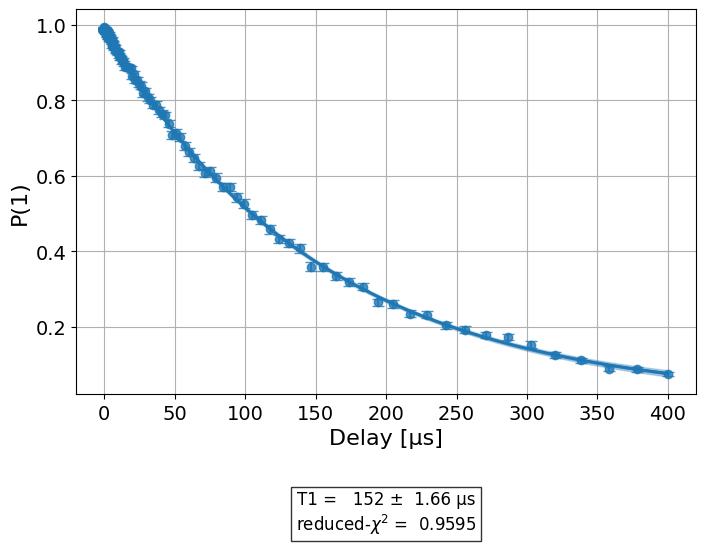

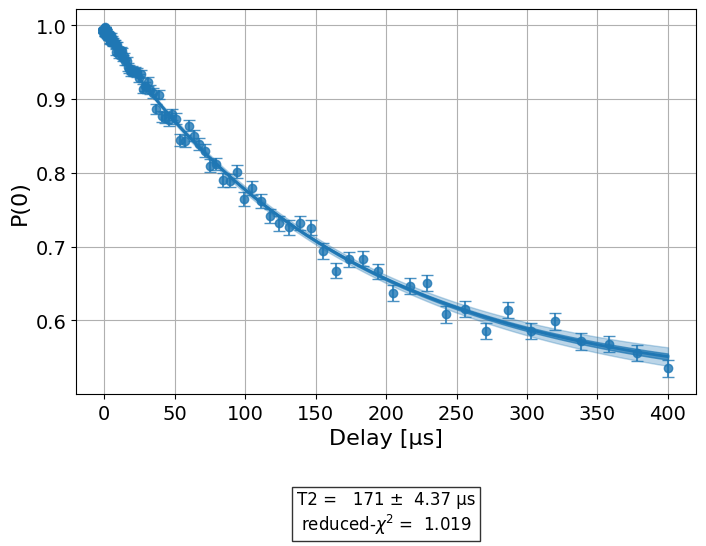

qubit_20


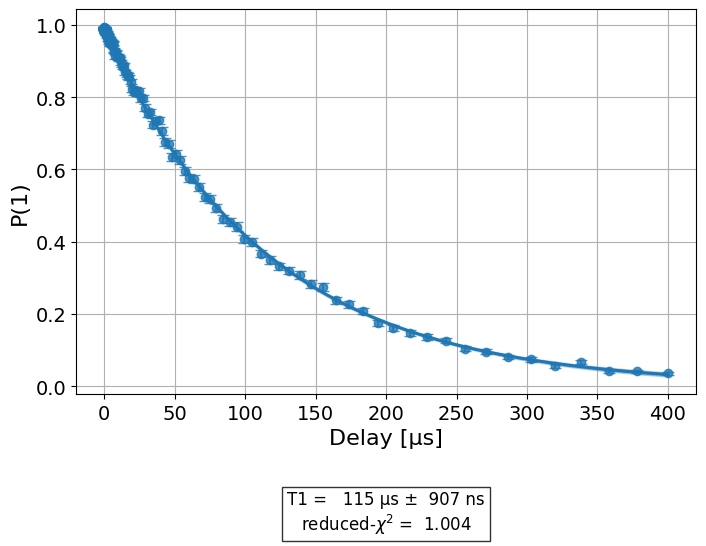

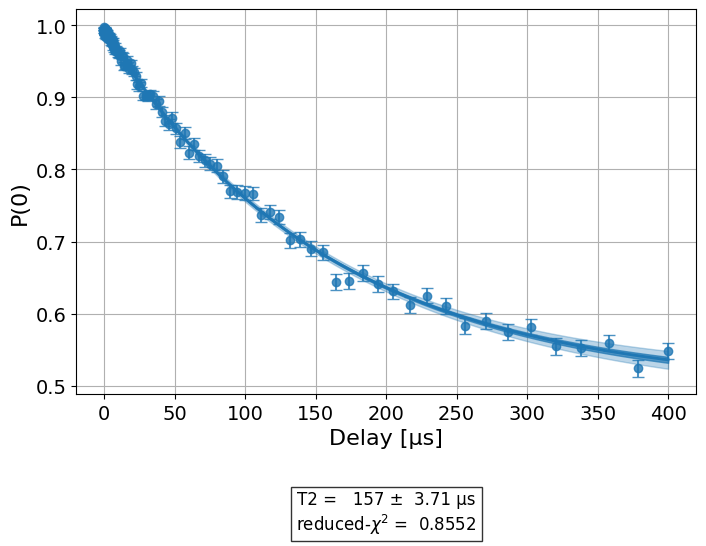

qubit_21


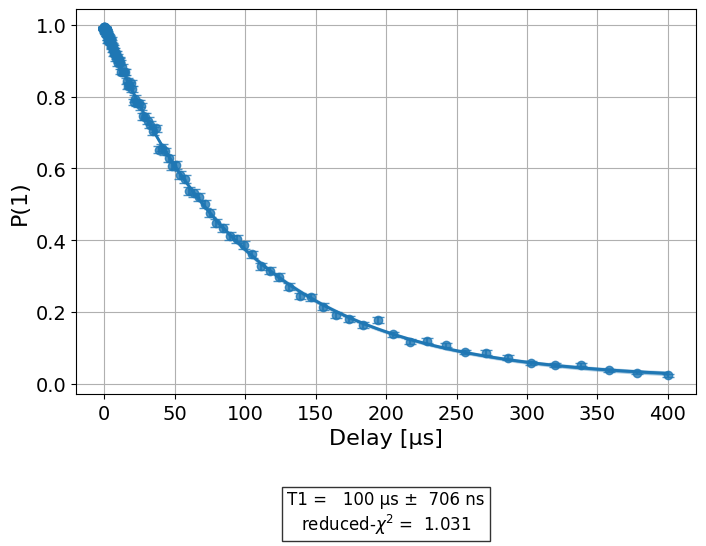

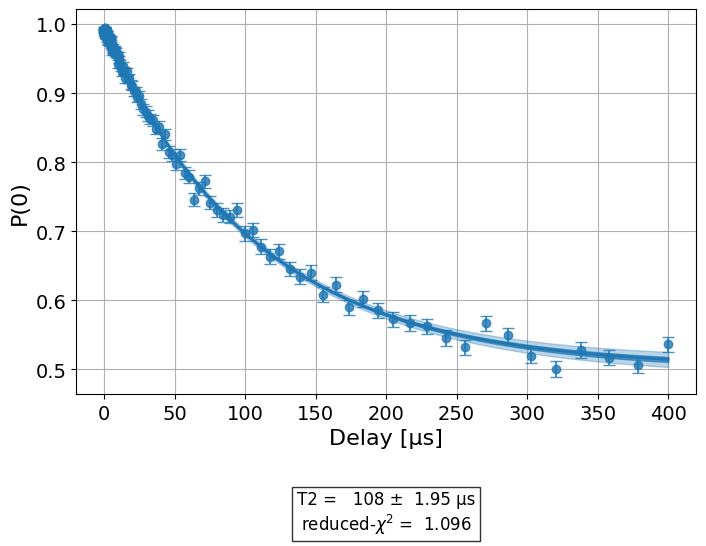

qubit_22


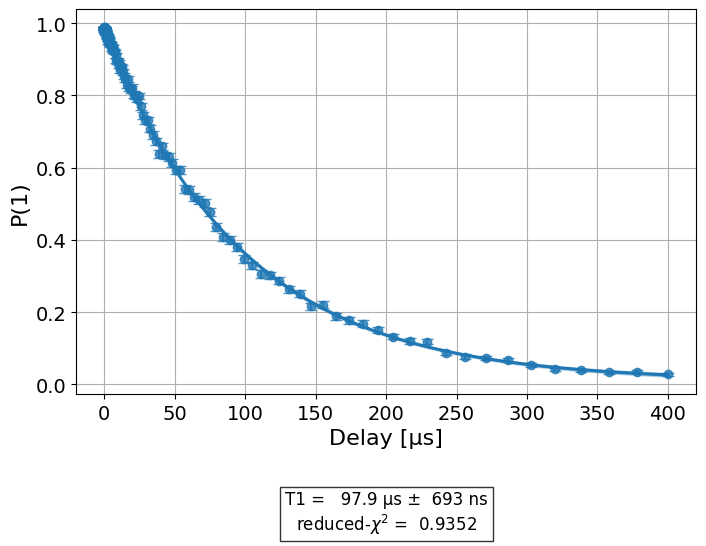

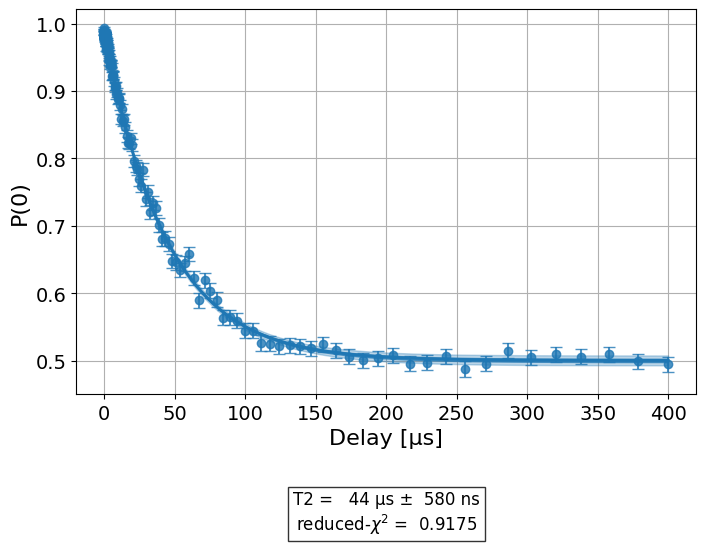

Batch7
qubit_6


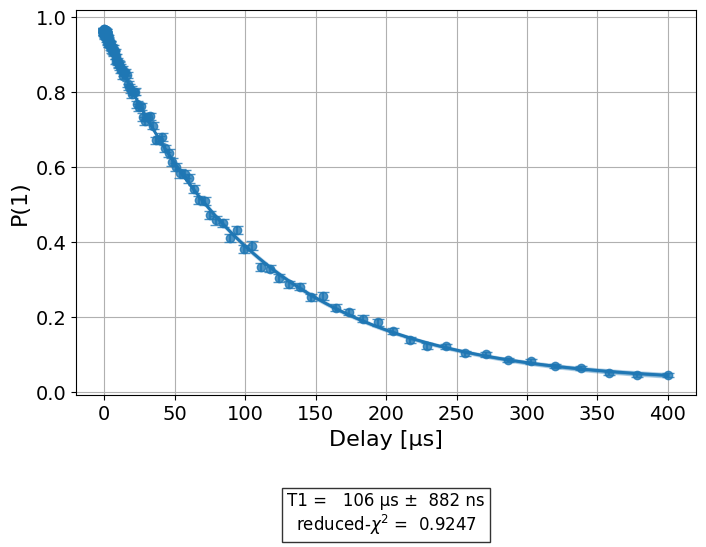

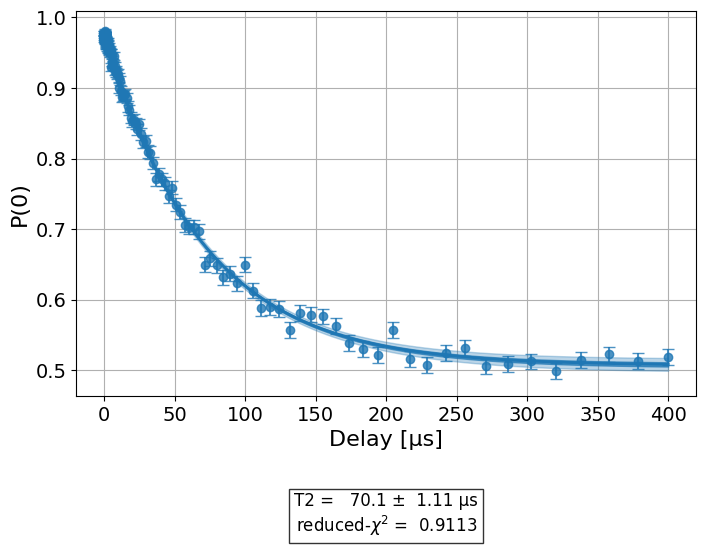

qubit_10


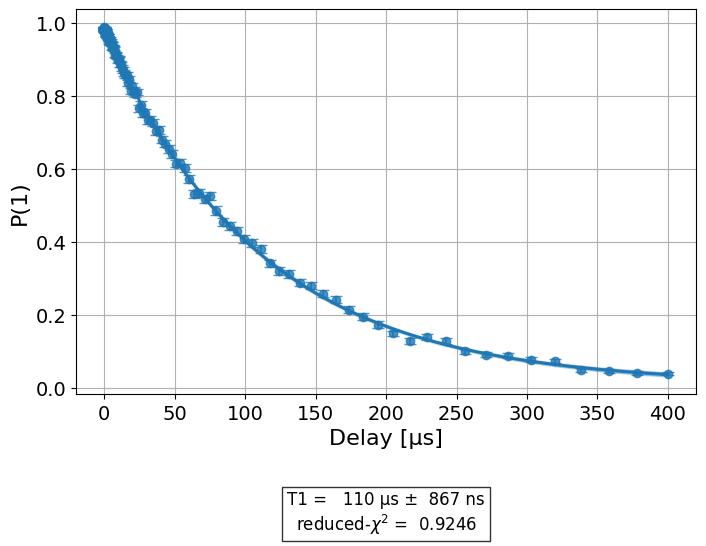

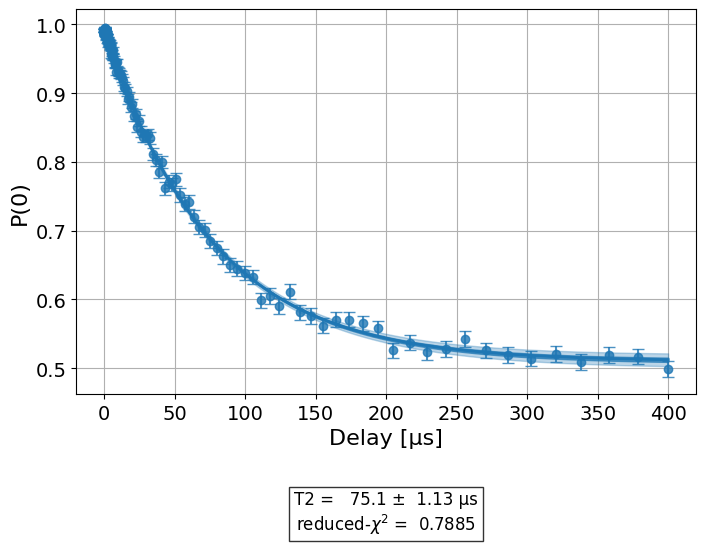

qubit_13


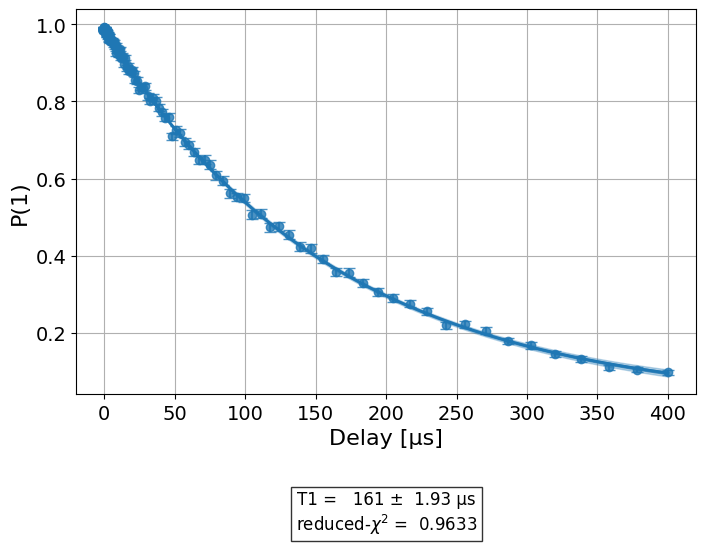

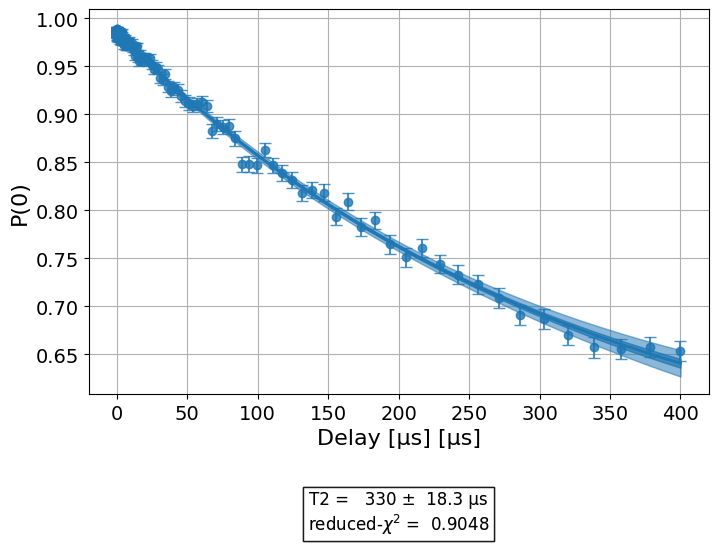

qubit_15


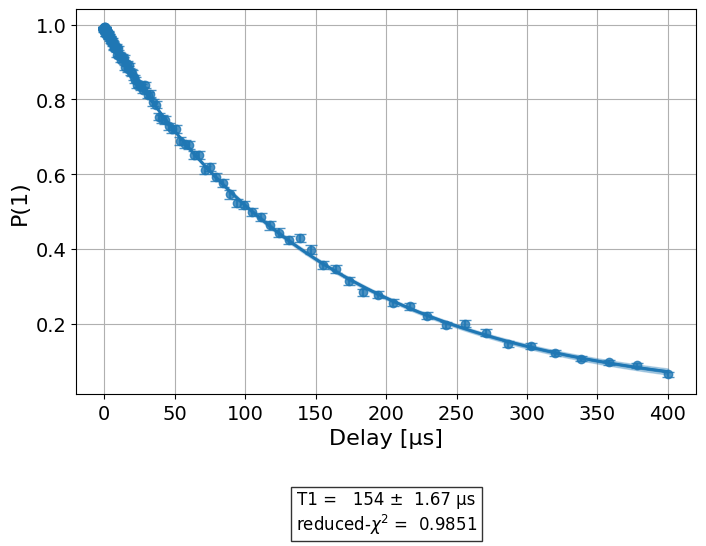

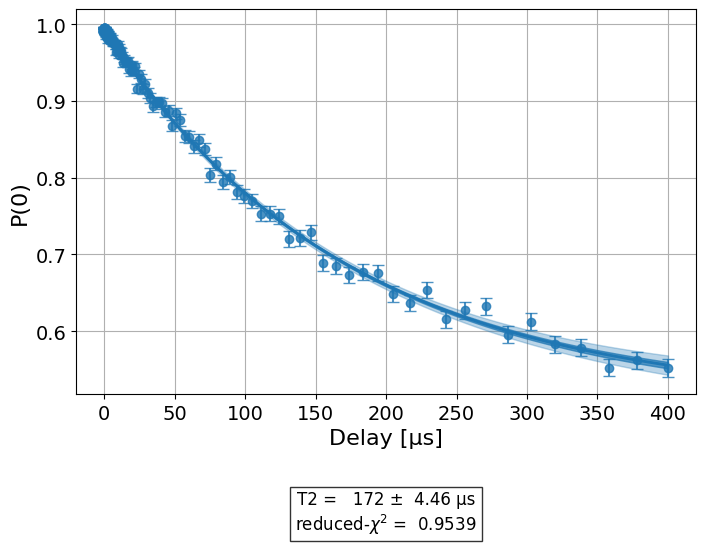

qubit_20


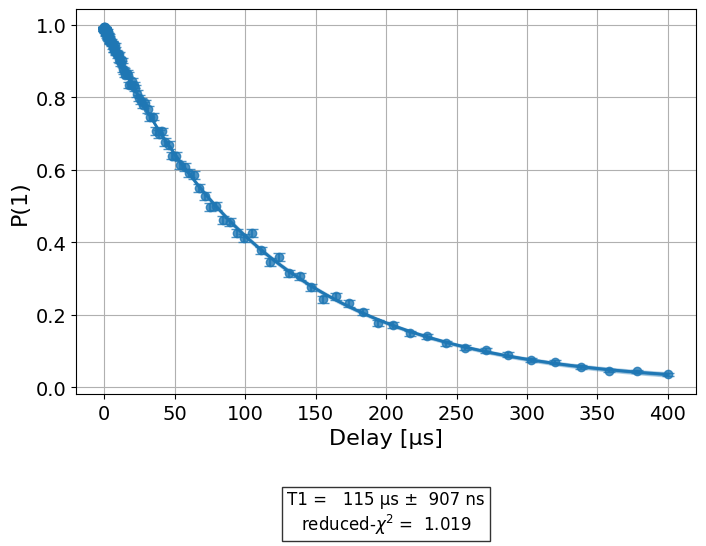

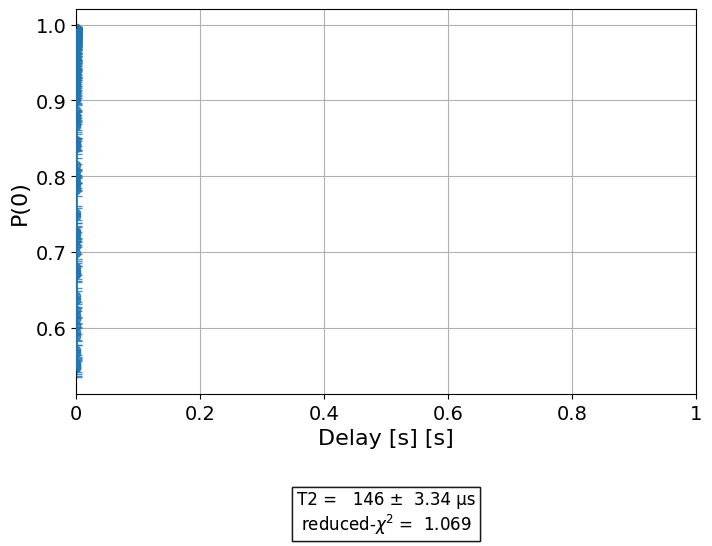

qubit_21


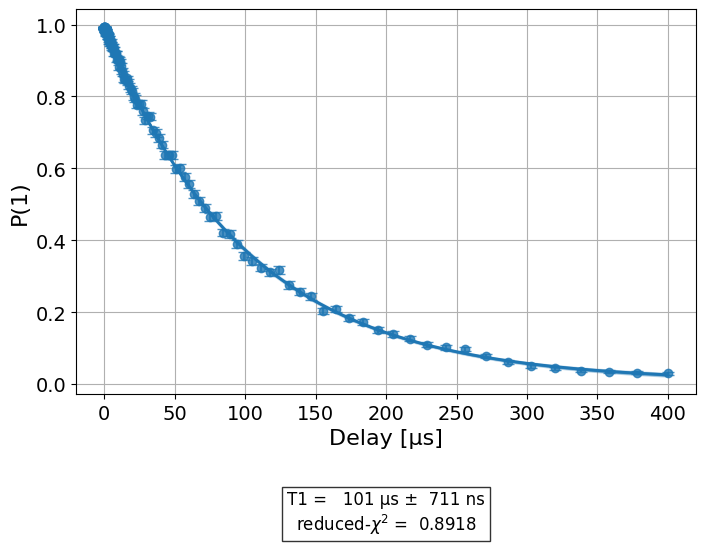

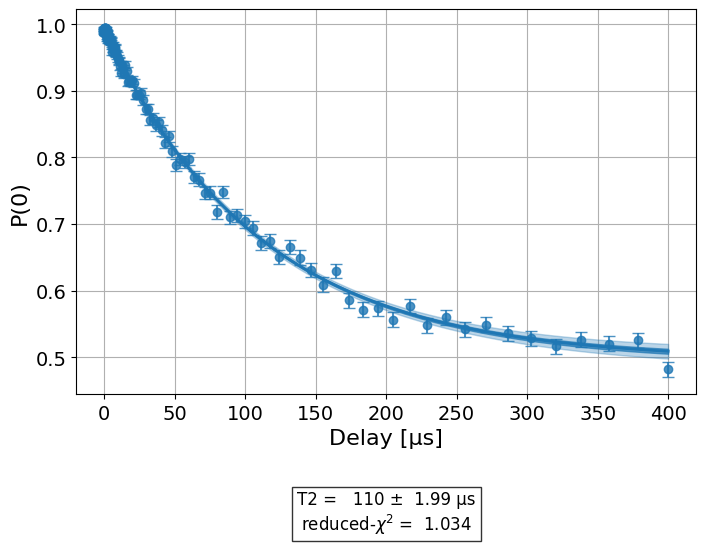

qubit_22


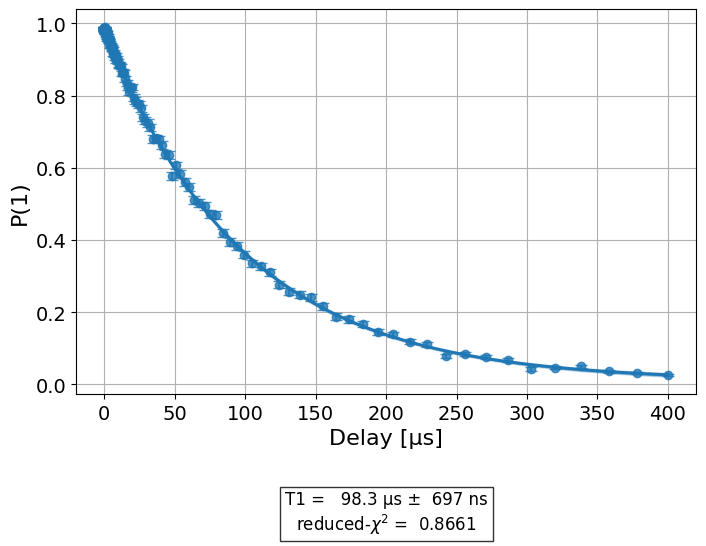

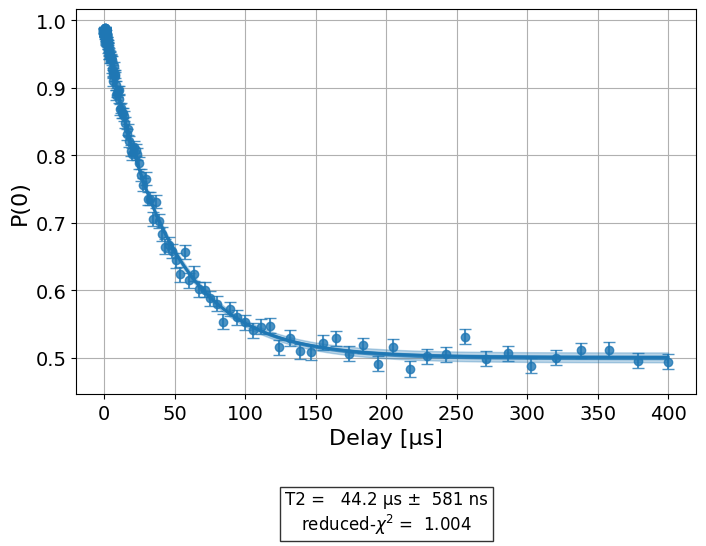

Batch8
qubit_6


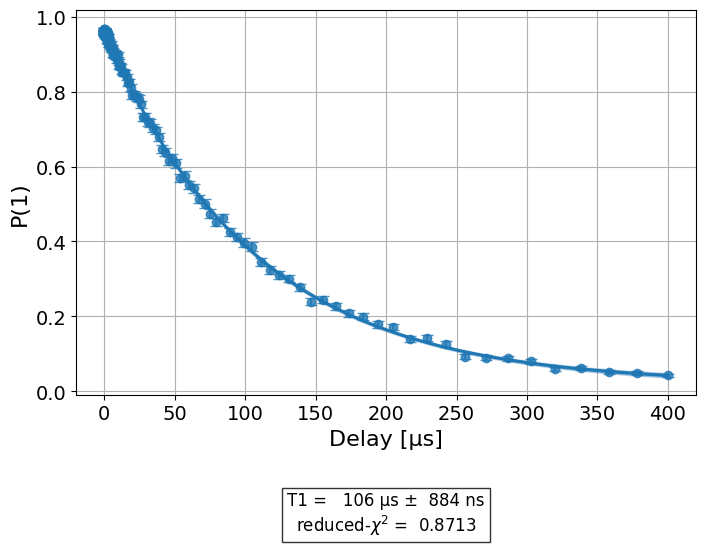

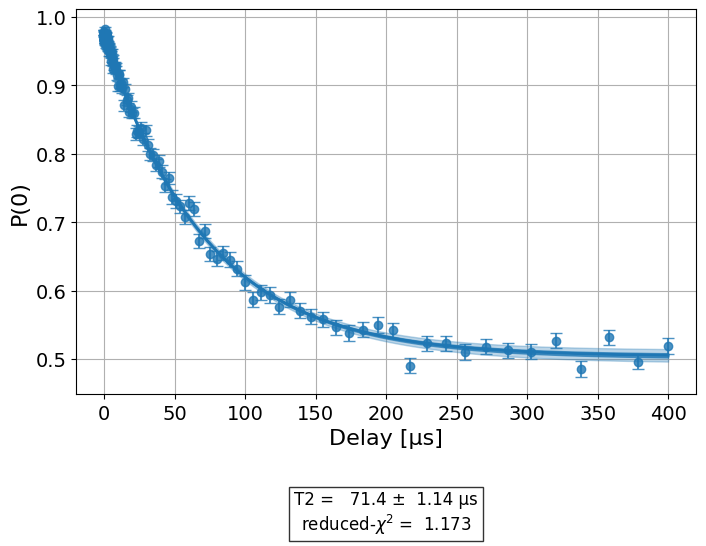

qubit_10


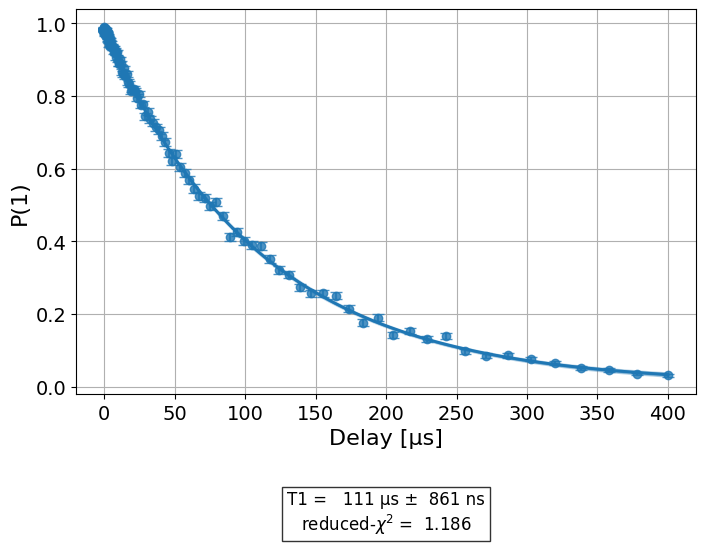

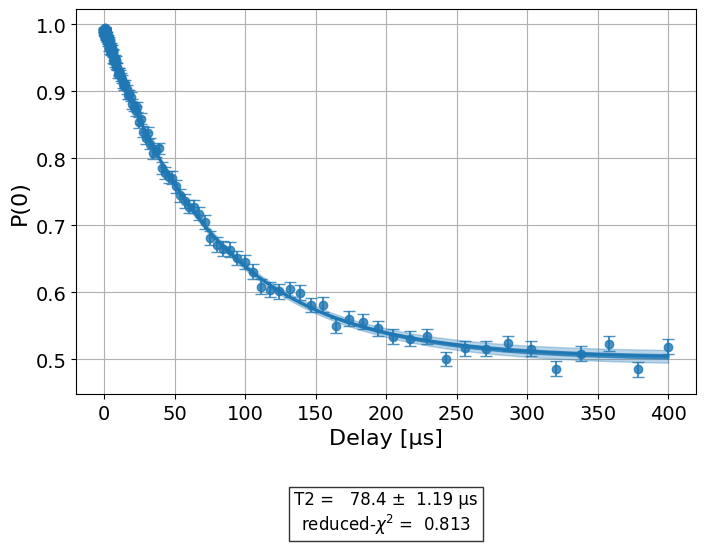

qubit_13


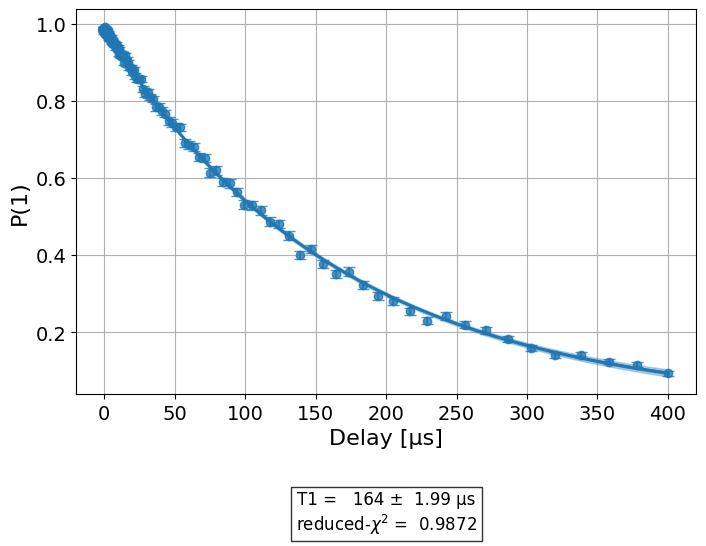

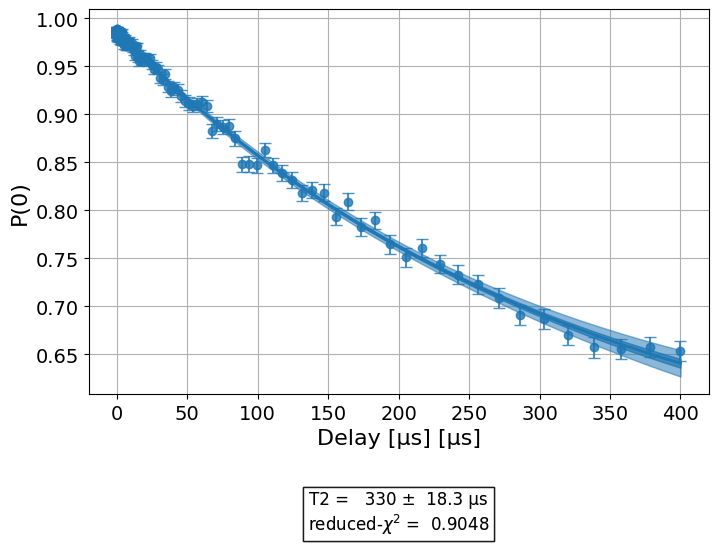

qubit_15


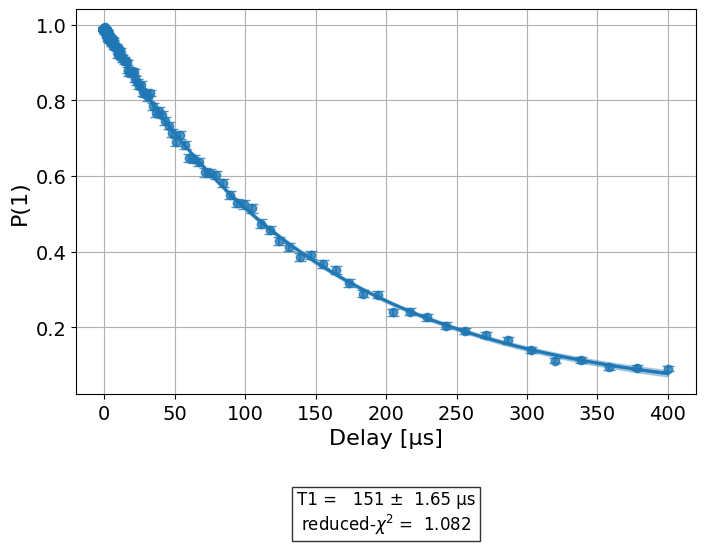

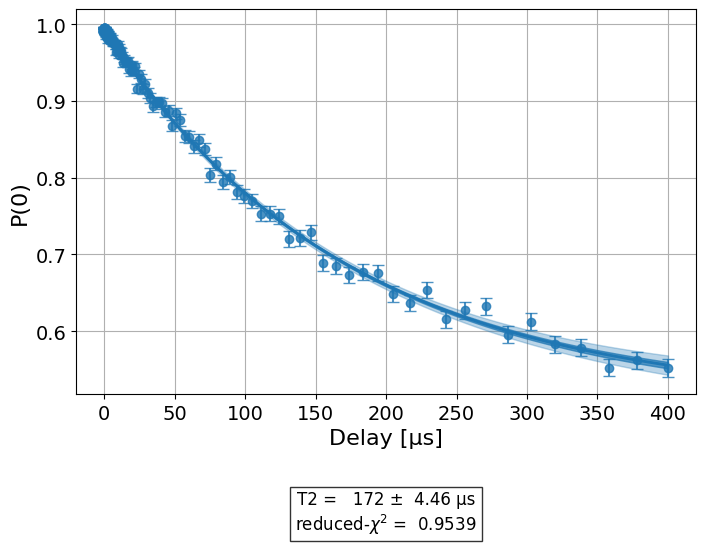

qubit_20


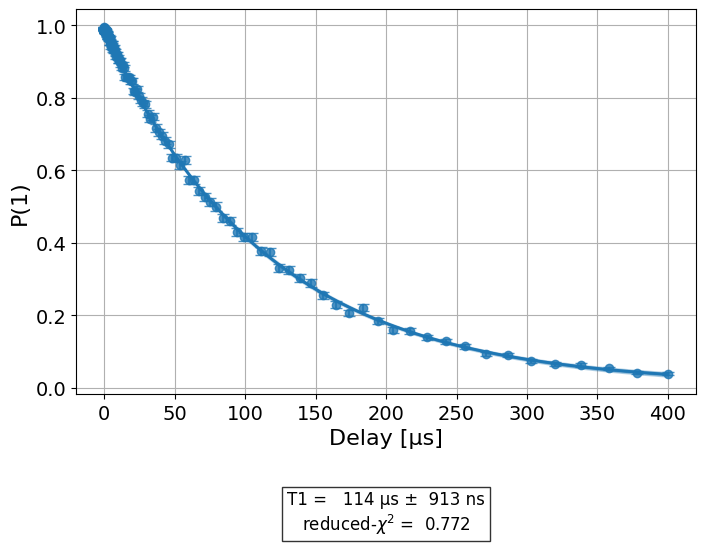

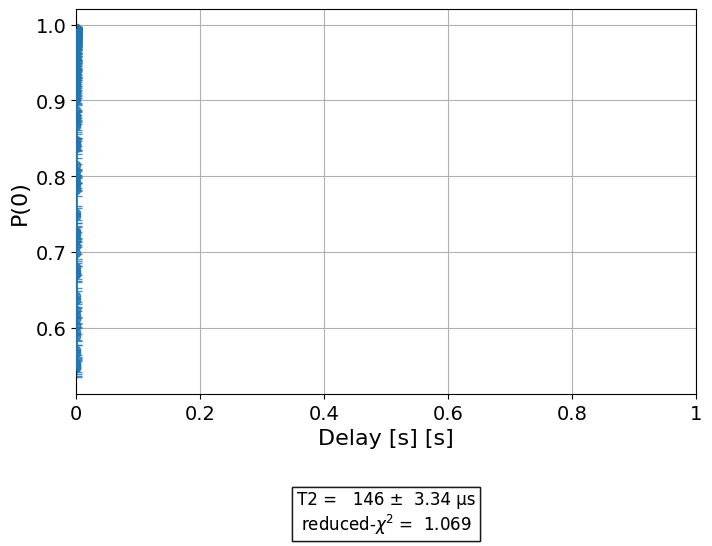

qubit_21


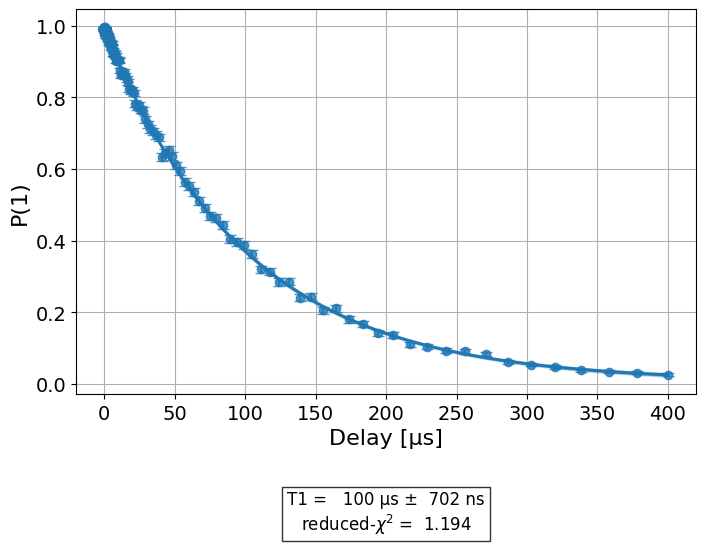

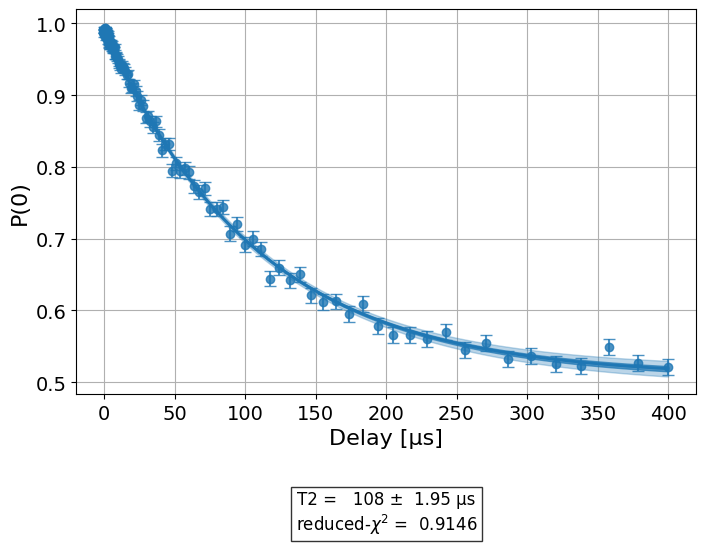

qubit_22


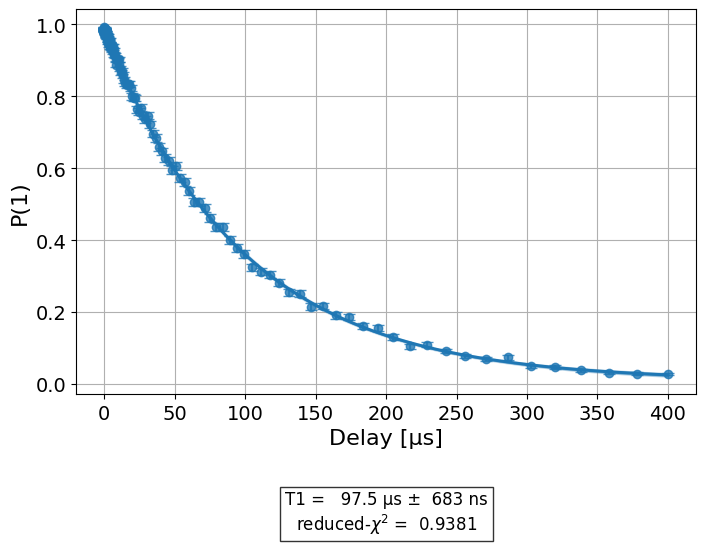

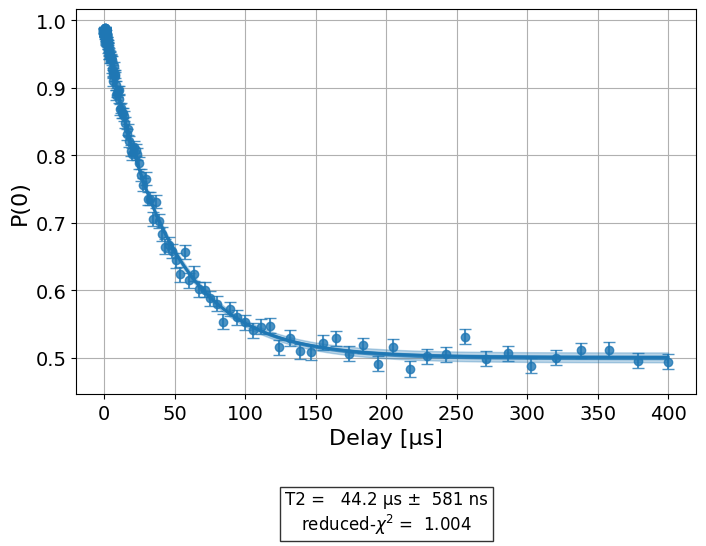

Batch9
qubit_6


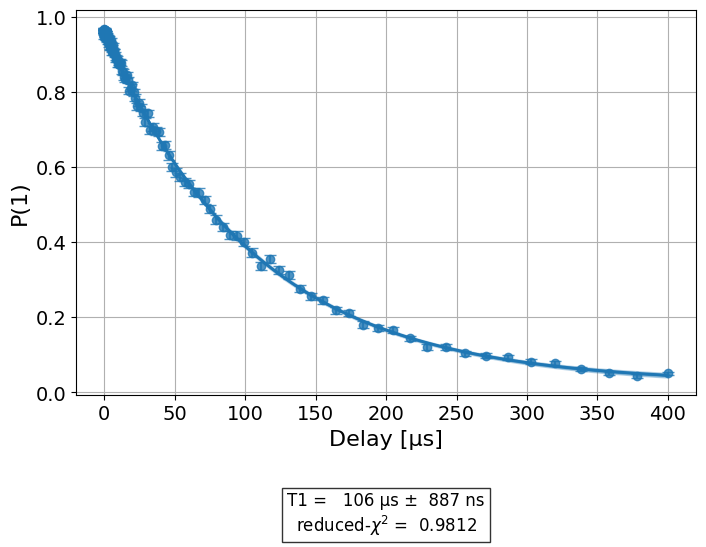

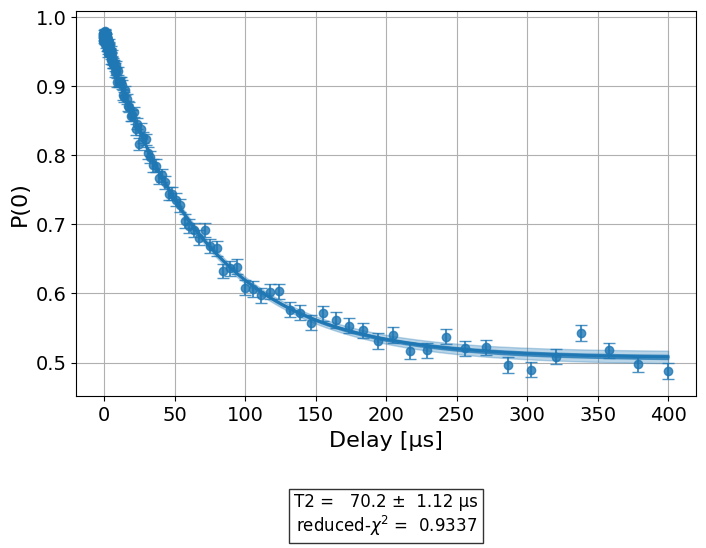

qubit_10


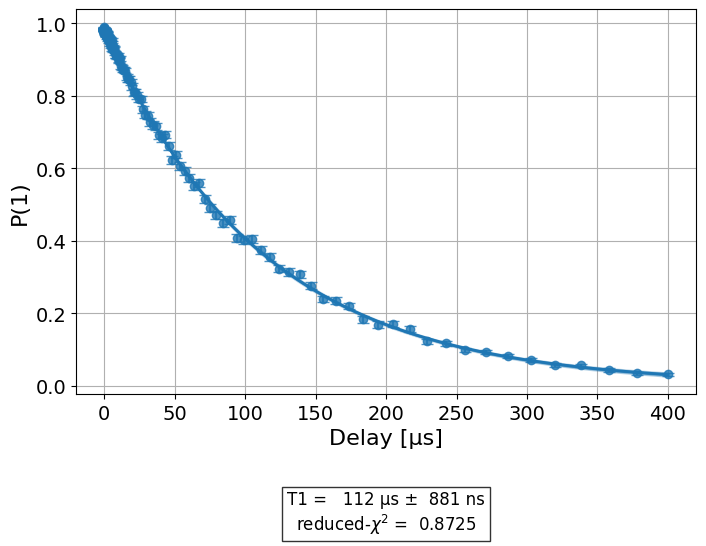

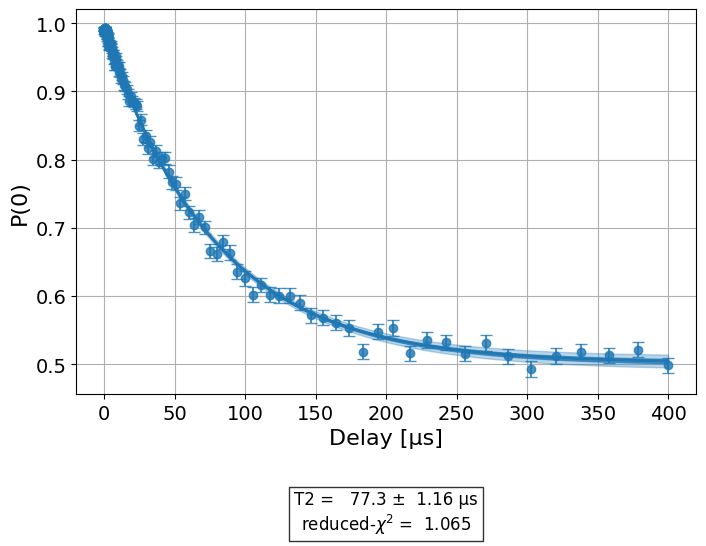

qubit_13


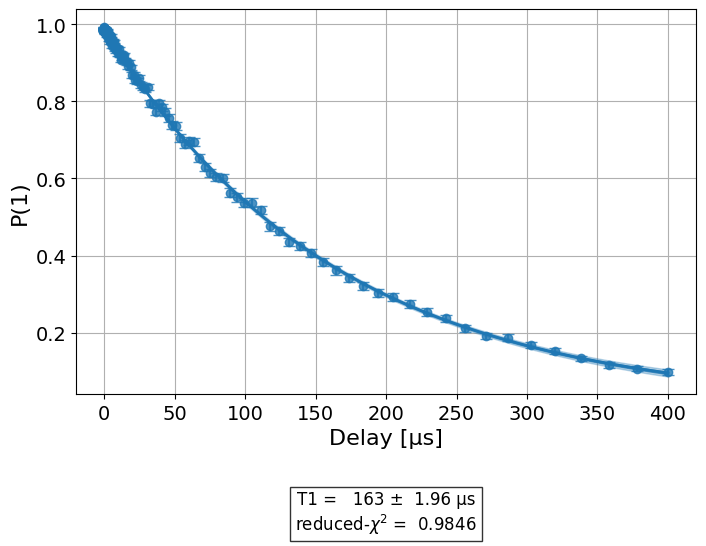

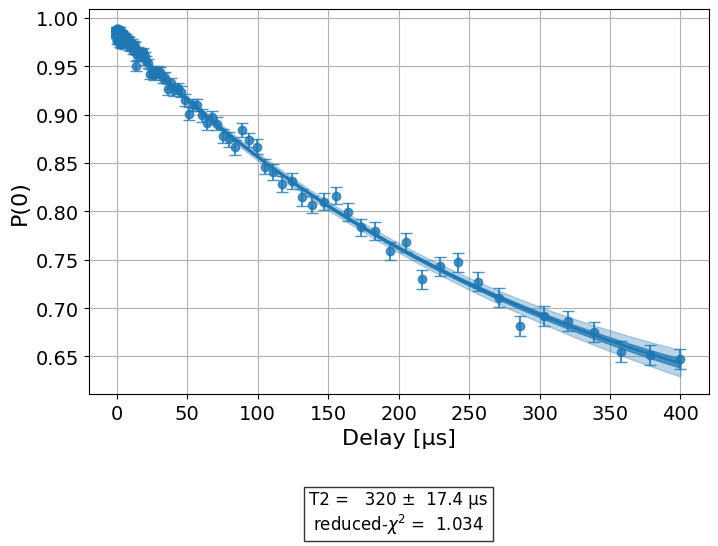

qubit_15


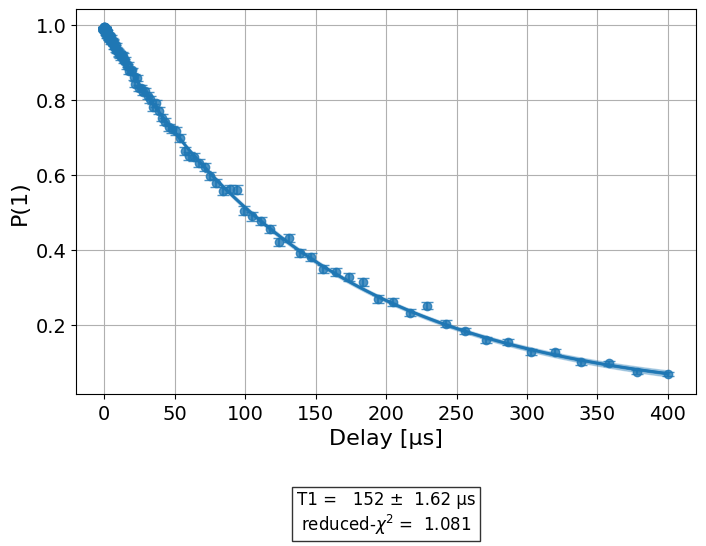

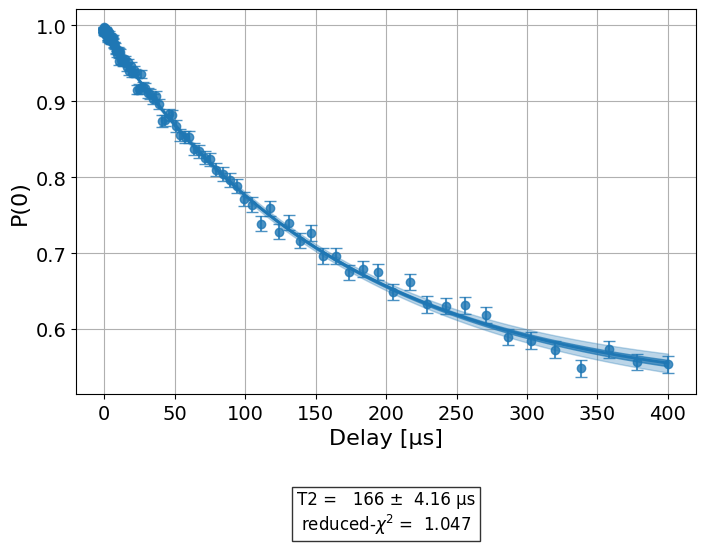

qubit_20


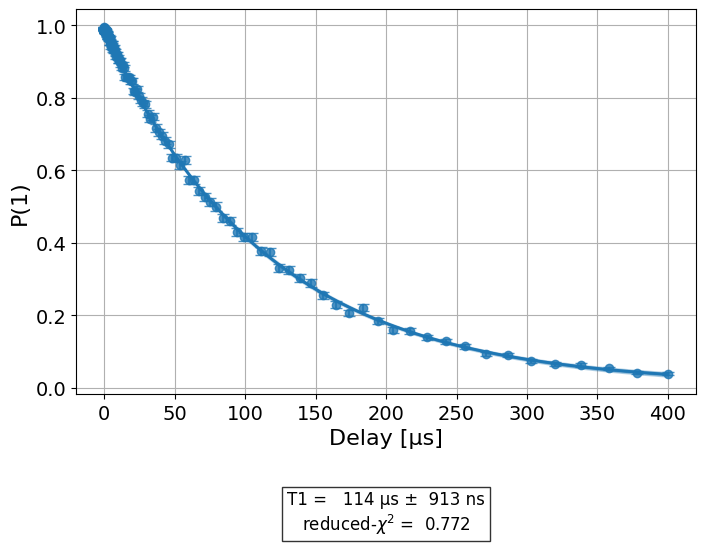

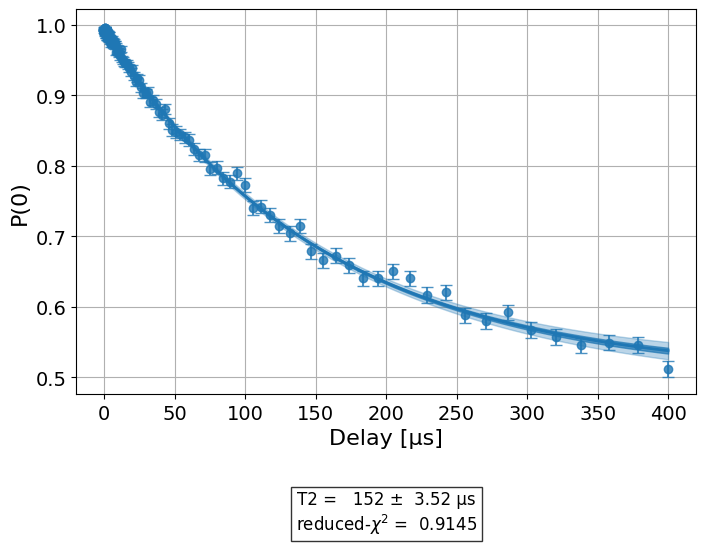

qubit_21


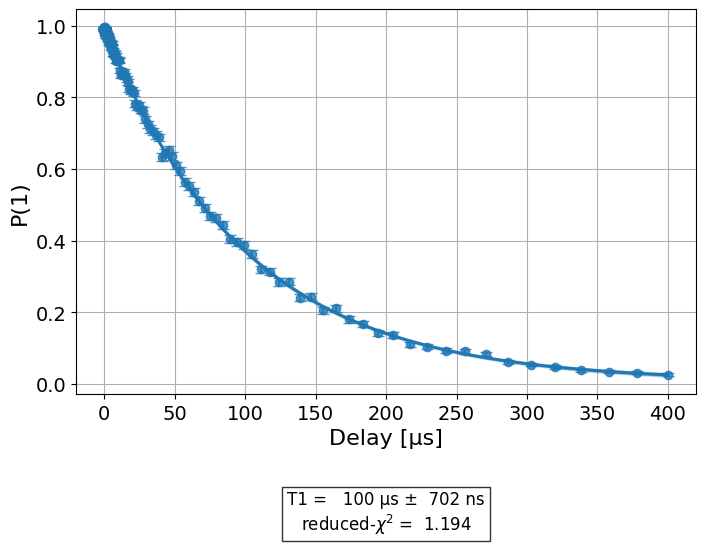

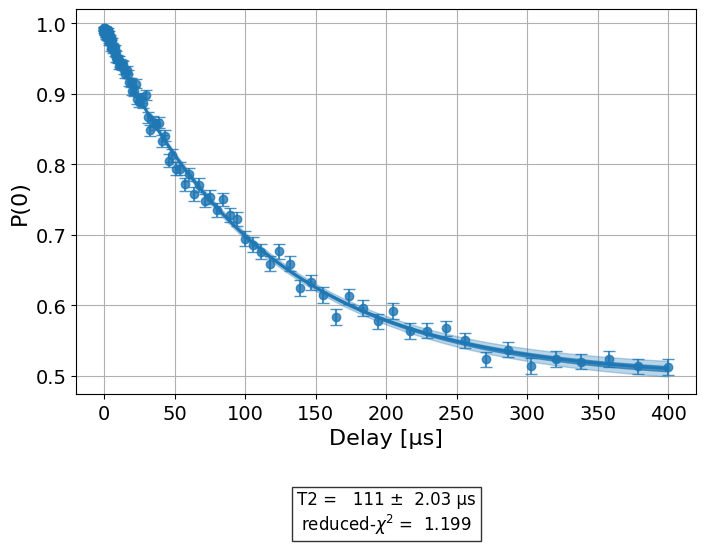

qubit_22


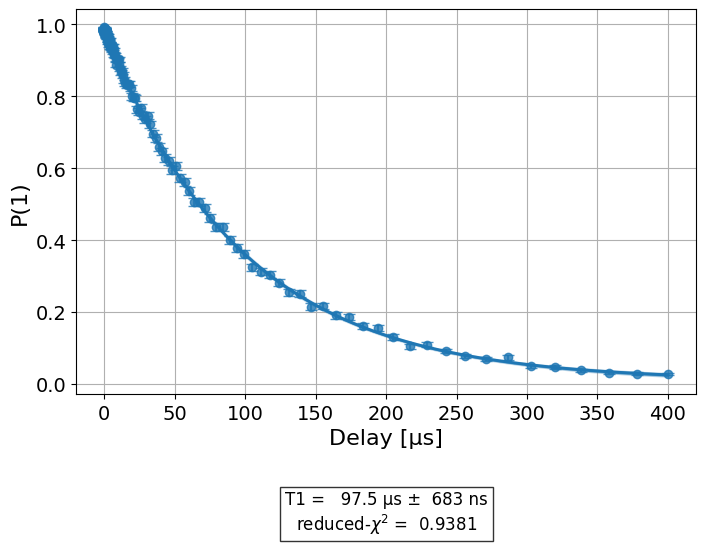

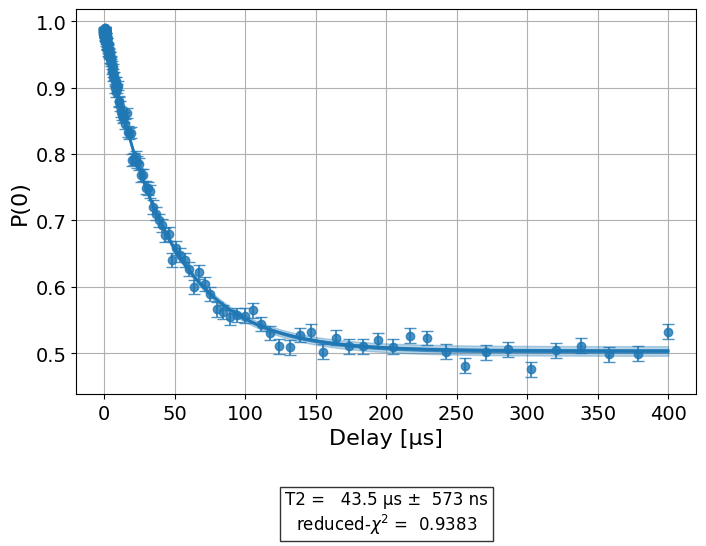

In [7]:
for i in range(num_batches) :
    
    print('Batch' + str(i))

    for j in range(len(physical_qubits)) :
        
        print('qubit_' + str(physical_qubits[j]))

        display(fig_t1[i][j], fig_t2[i][j])

In [20]:
batch_data = batch_result.data()

In [22]:
len(batch_data)

3000

In [27]:
batch_data[149]

{'counts': {'1 1 0 0 0 0 0': 1,
  '0 0 0 1 1 1 0': 1,
  '0 0 0 0 1 0 1': 2,
  '1 0 0 1 0 0 0': 7,
  '0 0 0 0 1 1 0': 5,
  '0 0 0 0 0 1 0': 58,
  '0 1 1 1 0 0 0': 1,
  '0 0 1 0 1 0 0': 4,
  '0 0 1 0 0 0 1': 2,
  '0 0 0 1 0 0 0': 111,
  '0 0 0 0 0 1 1': 2,
  '1 0 0 0 0 0 0': 37,
  '0 0 0 0 0 0 1': 55,
  '1 0 0 0 1 0 1': 1,
  '0 1 0 0 0 0 0': 35,
  '1 0 0 0 0 1 0': 2,
  '0 0 0 1 1 0 0': 19,
  '0 0 0 0 1 0 0': 143,
  '0 0 1 1 0 0 0': 4,
  '1 0 0 0 1 0 0': 5,
  '0 1 0 0 1 0 0': 2,
  '0 1 1 0 0 0 0': 2,
  '0 0 0 1 0 0 1': 9,
  '0 0 0 1 0 1 0': 2,
  '0 1 0 1 0 0 0': 4,
  '0 0 1 0 0 0 0': 50,
  '0 0 0 0 0 0 0': 1436},
 'job_id': '2dedf372-85ba-4086-814f-d48cc513b13e',
 'metadata': {'experiment_type': 'BatchExperiment',
  'composite_metadata': [{'experiment_type': 'ParallelExperiment',
    'composite_index': [0, 1, 2, 3, 4, 5, 6],
    'composite_metadata': [{'experiment_type': 'T1',
      'qubit': 6,
      'unit': 's',
      'xval': 0.00039999999999999996},
     {'experiment_type': 'T1',
      

In [ ]:
batch_circuit = batch_exp[0].circuits()